In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
#import missingno as msno
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
import plotly.express as px

df=pd.read_csv(r"/content/drive/MyDrive/OSMI/mental_health_dataset.csv")
df17=pd.read_excel("/content/drive/MyDrive/OSMI/Mental-Health-in-Tech/Data/OSMI 2017.xlsx")
df18=pd.read_excel("/content/drive/MyDrive/OSMI/Mental-Health-in-Tech/Data/OSMI 2018.xlsx")
df19=pd.read_excel("/content/drive/MyDrive/OSMI/Mental-Health-in-Tech/Data/OSMI 2019 .xlsx")
df20=pd.read_excel("/content/drive/MyDrive/OSMI/Mental-Health-in-Tech/Data/OSMI 2020.xlsx")
df21=pd.read_excel("/content/drive/MyDrive/OSMI/Mental-Health-in-Tech/Data/OSMI 2021.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Indepedent variables that can be used: Age, gender, family history and benefits offered by employer


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/OSMI/mental_health_dataset.csv")
for col in df.columns:
    print(col)

Are you self-employed?
How many employees does your company or organization have?
Is your employer primarily a tech company/organization?
Is your primary role within your company related to tech/IT?
Does your employer provide mental health benefits as part of healthcare coverage?
Do you know the options for mental health care available under your employer-provided coverage?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
Do you think that discussing a mental health disorder with your employer would have negative consequences?
Do you think that disc

In [ ]:
renamed_columns=["Self_employed","Total_employees","Tech_organization","IT_Tech","Mental_health_coverage","Awareness_of_options_under_coverage","Employers_discussion_on_mental_health","Resources_and_options_for_help","Anomity_of_employees_using_mental_health_resources","Mental_issue_related_leave","Discussing_mental_health_neg_consequences","Discussing_physical_health_neg_consequences","Comfort_discussing_with_coworkers","Comfort_discussing_with_supervisor","Employer_seriousness_on_mental_health","Negative_consequences_of_coworkers_with_mental_health_disorder","Medical_coverage","Aware_of_local_online_resources","Reveal_condition_to_clients_business_contacts","Consequence_if_revealed_health_issue_to_client_or_business_contact",'Diagnosed_but_not_revealed_with_coworkers_employees','negimpact_reveal_coworker','prod_affect_mental_issue','percent_worktime_affected','have_prev_empl','prev_empl_mental_benefits','aware_benefits_prev_empl','formal_discuss_mental_health_premp','premp_provide_resources_learn_seekhelp','anonymity_protect_premp_choose_resources','neg_eff_discuss_mental_health_premp','neg_eff_discuss_phy_health_premp','willing_discuss_issue_prev_coworkers','willing_discuss_issue_dir_supervisors','premp_took_menhealth_seriously_as_phyhealth','neg_comments_abt_coworkers_with_menissues_prev_workplace','bring_phyhealth_issue_with_potential_empl_interview','phy_y_ynot','bring_menhealth_issue_with_potential_empl_interview','men_y_ynot','hurt_carrer_if_identified_as_person_with_mental_issue','more_neg_view_from_coworker_if_know_abt_men_issue','share_w_friends_fam','workplace_response','other_exp_in_workplace','fam_hist','past_mh','curr_mh','diagnosed','maybe_diagnosed','diagnosed_prof','diagnosed_prof_mh','treatment_mh_prof','work_interference_treatment','work_interference_no_treatment','age','gender','country_live','us_state_live','country_work','us_state_work','work_pos','remote']
df.columns=renamed_columns

In [ ]:

to_drop_columns=[i for i in df.columns if df[i].isna().sum()>df.shape[0]/2]
print(to_drop_columns)
df.drop(to_drop_columns,axis=1,inplace=True)

['IT_Tech', 'Medical_coverage', 'Aware_of_local_online_resources', 'Reveal_condition_to_clients_business_contacts', 'Consequence_if_revealed_health_issue_to_client_or_business_contact', 'Diagnosed_but_not_revealed_with_coworkers_employees', 'negimpact_reveal_coworker', 'prod_affect_mental_issue', 'percent_worktime_affected', 'other_exp_in_workplace', 'diagnosed', 'maybe_diagnosed', 'diagnosed_prof_mh']


In [ ]:
#gender has 70 different classes. Encoding them to fewer classes for ease of calculation:
#male:1, female:2, anything else:3
df['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 1, inplace = True)

df['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman','Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 2, inplace = True)

df['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman','NaN'], value = 3, inplace = True)
#Change all non-responses to 3
df['gender'].replace(to_replace=[np.NaN], value=3,inplace=True)

In [ ]:
#columns 'phy_y_ynot' and 'men_y_ynot' mainly contain comments which aren't of much use for our problem definition
# hence, we drop the columns 'phy_y_ynot' and 'men_y_ynot'
df.drop(labels ='phy_y_ynot', axis = 1, inplace = True)
df.drop(labels ='men_y_ynot', axis = 1, inplace = True)

# dealing with missing values in 'prev_empl_mental_benefits'
# from previous operation, we see that, whenever the value for have_prev_empl = 0, then the value for 'prev_empl_mental_benefits' = Nan
# hence replacing the nans with "Not Applicable"
df['prev_empl_mental_benefits'].fillna('Not Applicable',inplace= True)
df['prev_empl_mental_benefits'].unique()

# the same observation was found for the missing values in columns from formal_discuss_mental_health_premp' to'neg_comments_abt_coworkers_with_menissues_prev_workplace'
# replacing missing values
# whenever the value for have_prev_empl = 0, then the value in the other col= Nan
# hence replacing the nans with "Not Applicable"
df['aware_benefits_prev_empl'].fillna('Not Applicable',inplace= True)
df['formal_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['premp_provide_resources_learn_seekhelp'].fillna('Not Applicable',inplace= True)
df['anonymity_protect_premp_choose_resources'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_mental_health_premp'].fillna('Not Applicable',inplace= True)
df['neg_eff_discuss_phy_health_premp'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_dir_supervisors'].fillna('Not Applicable',inplace= True)
df['willing_discuss_issue_prev_coworkers'].fillna('Not Applicable',inplace= True)
df['premp_took_menhealth_seriously_as_phyhealth'].fillna('Not Applicable',inplace= True)
df['neg_comments_abt_coworkers_with_menissues_prev_workplace'].fillna('Not Applicable',inplace= True)

#Acronyms of countries with long names (United states of america)
df['country_live'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_live'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)
df['country_work'].replace(to_replace = ['United States of America'], value = 'USA', inplace = True)
df['country_work'].replace(to_replace = ['United Kingdom'], value = 'UK', inplace = True)

#Removing age outliers (323,3,etc). Replace such ages with the mean of all ages
mean_age = df[(df['age'] >= 18) | (df['age'] <= 80)]['age'].mean()
df['age'].replace(to_replace = df[(df['age'] < 18) | (df['age'] > 75)]['age'].tolist(),
                          value = mean_age, inplace = True)
#df=df.dropna()

In [ ]:
df.isnull().sum().sum()

32490

In [ ]:

#Remaining columns with null values
for i in df.columns:
    if(df[i].isnull().values.any()):
        print(i)

Total_employees
Tech_organization
Mental_health_coverage
Awareness_of_options_under_coverage
Employers_discussion_on_mental_health
Resources_and_options_for_help
Anomity_of_employees_using_mental_health_resources
Mental_issue_related_leave
Discussing_mental_health_neg_consequences
Discussing_physical_health_neg_consequences
Comfort_discussing_with_coworkers
Comfort_discussing_with_supervisor
Employer_seriousness_on_mental_health
Negative_consequences_of_coworkers_with_mental_health_disorder
workplace_response
us_state_live
us_state_work


In [ ]:
# Replace missing values in 'Total_employees' with '1-5'
df['Total_employees'] = df['Total_employees'].replace(to_replace=np.nan, value='1-5')

# Replace missing values in 'Tech_organization' with mode (mode returns a series, so we access the first value)
df['Tech_organization'] = df['Tech_organization'].fillna(df['Tech_organization'].mode()[0])

# Grouping by 'Self_employed' and filling missing values in each column with mode of the respective group
for column in df.columns:
    if column != 'Self_employed':
        # Use transform to ensure the result has the same index as the original DataFrame
        df[column] = df.groupby('Self_employed')[column].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))



In [ ]:
df_no_drp = df

In [ ]:
#Dropping remainig rows which still contained missing values
df=df.dropna()

In [ ]:
df.isnull().sum().sum()

0

Heat Map

   Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \


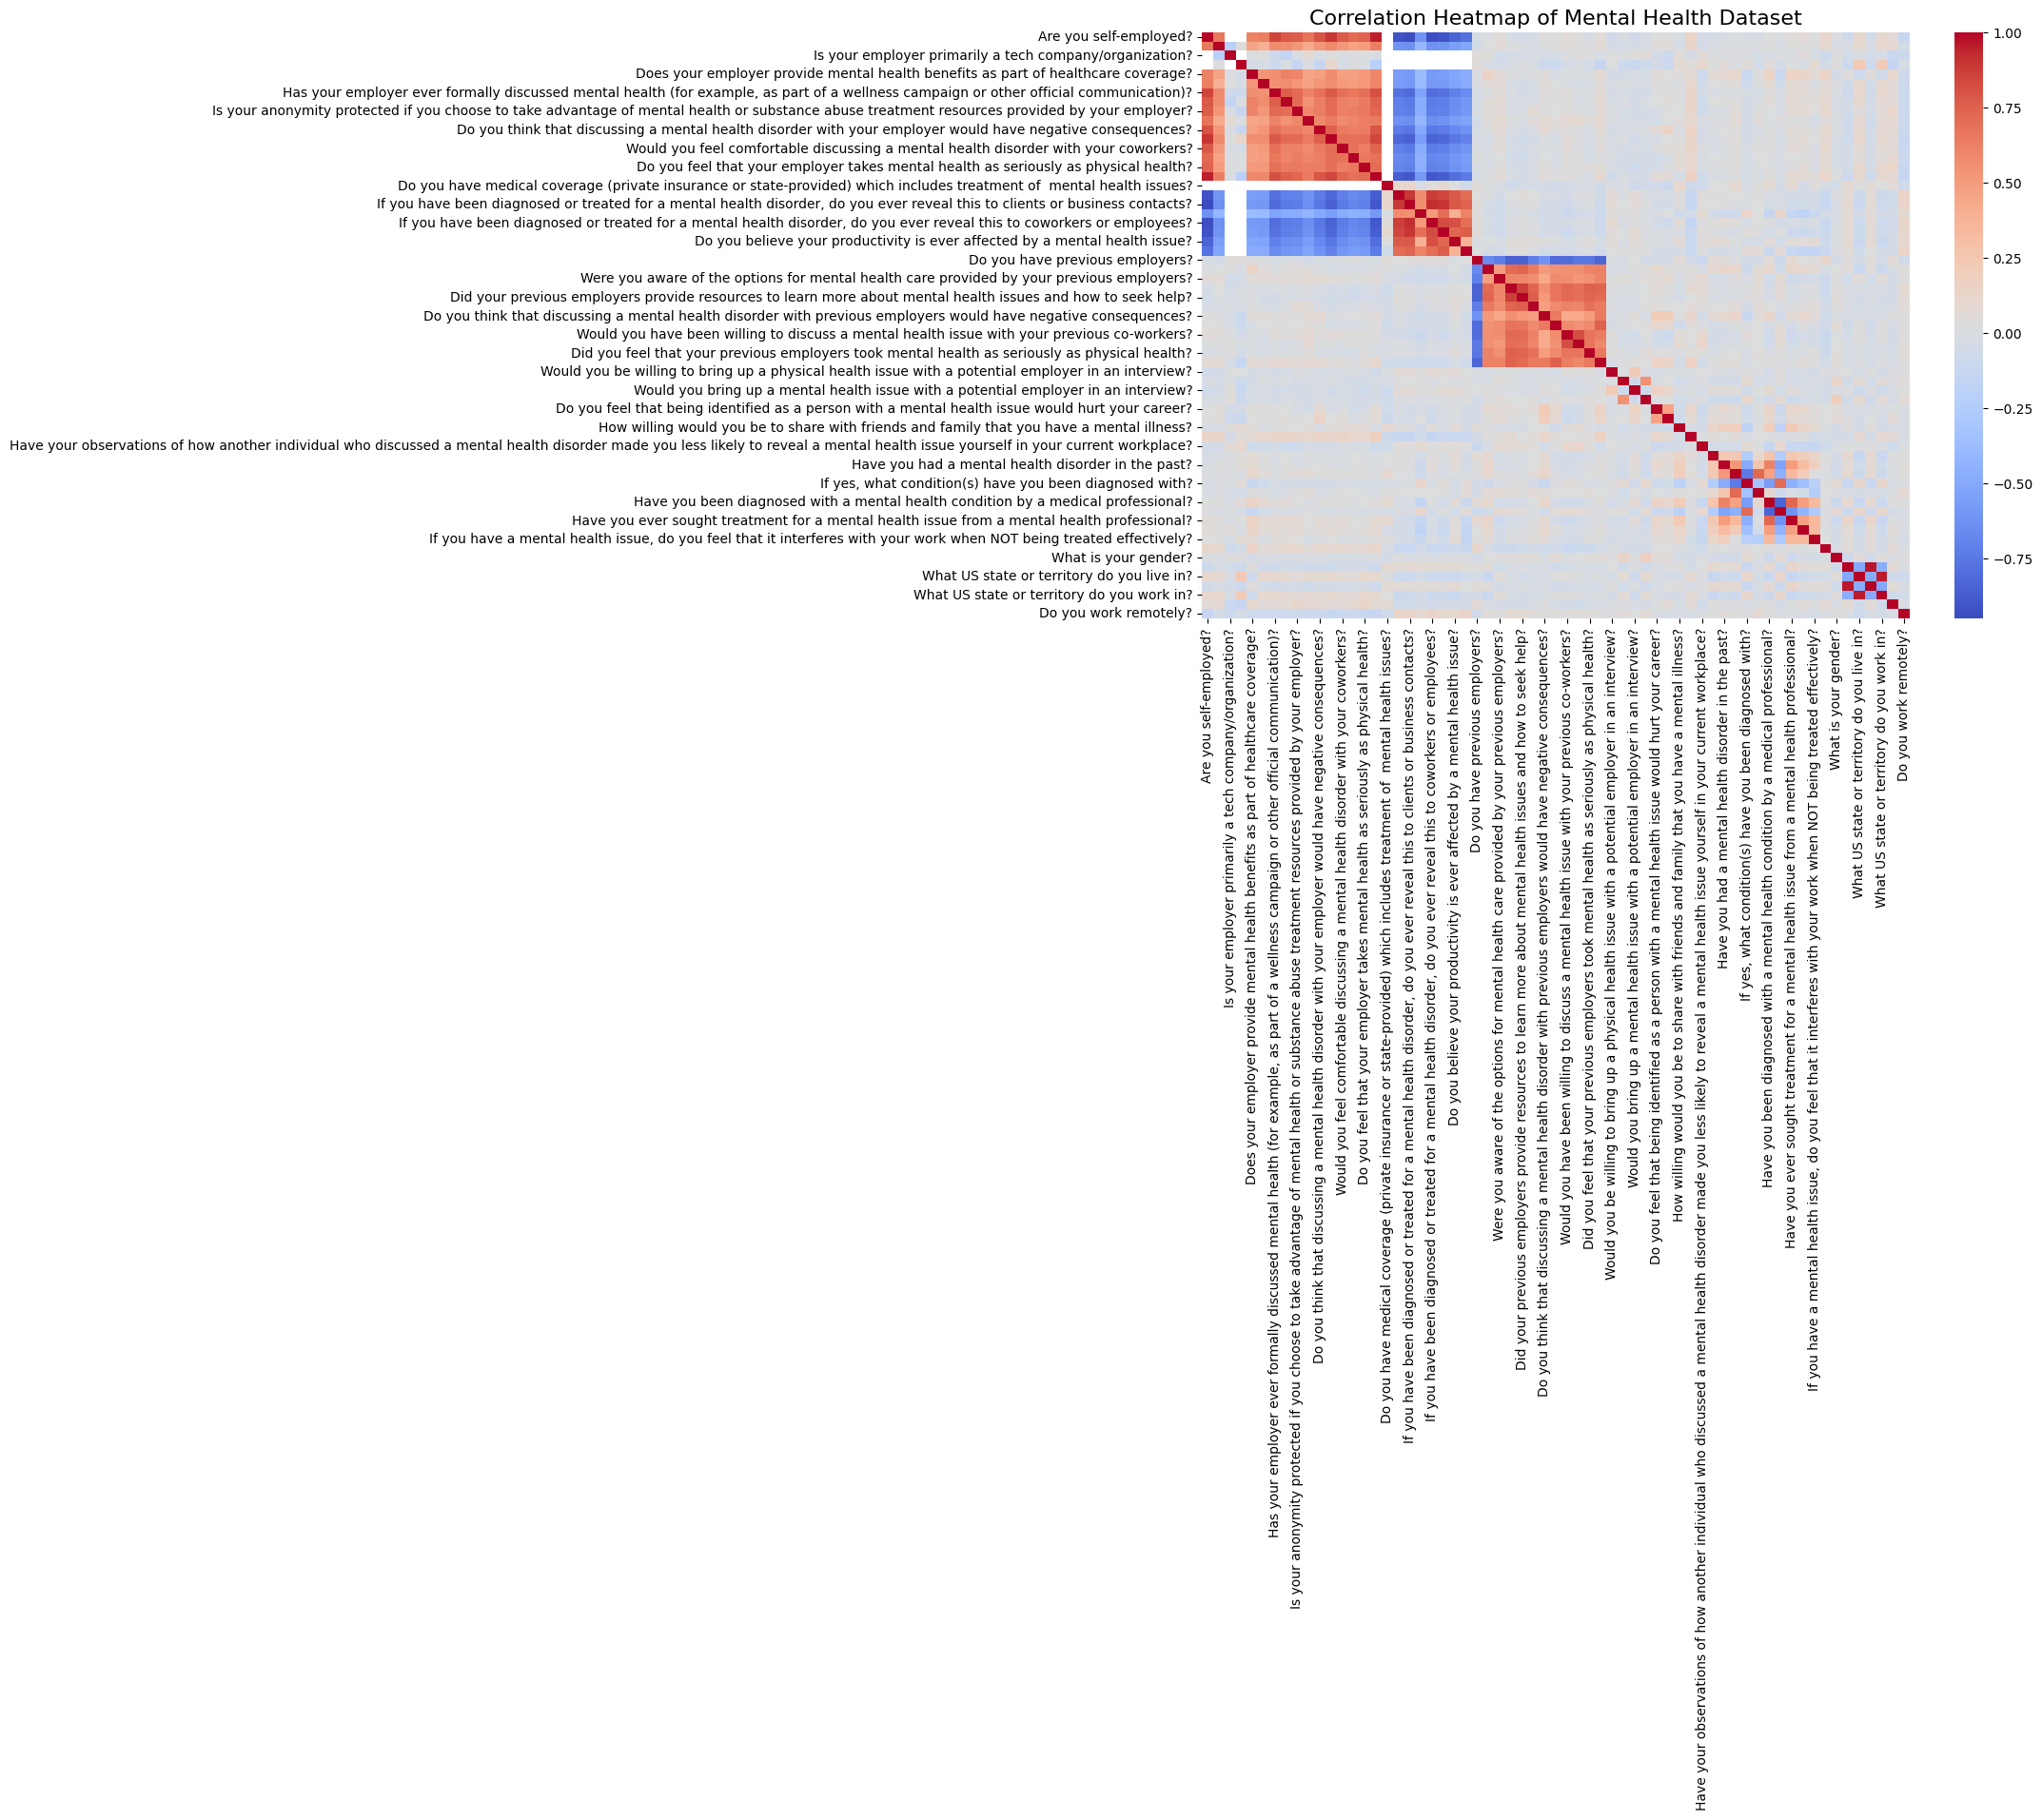

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/content/drive/MyDrive/OSMI/mental_health_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand the dataset
print(df.head())

# Convert categorical columns to numeric using LabelEncoder
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)

# Add titles and labels
plt.title("Correlation Heatmap of Mental Health Dataset", fontsize=16)
plt.show()


Encoding

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset (replace with the correct path if needed)
# df = pd.read_csv('/content/drive/MyDrive/OSMI/expanded_mental_health_10k.csv')

# Manually encode specific columns as per the provided mapping
No_of_pos = []
for i in df['work_pos']:
    No_of_pos.append(i.count('|') + 1)
df['No_of_pos'] = No_of_pos
df.drop(labels='work_pos', axis=1, inplace=True)

encode = {
    'Total_employees': [['26-100', '6-25', '0', 'More than 1000', '100-500', '500-1000', '1-5'], [3, 2, 0, 6, 4, 5, 1]],
    'Mental_health_coverage': [['Not eligible for coverage / N/A', 'No', 'Yes', "I don't know"], [0, 2, 3, 1]],
    'Awareness_of_options_under_coverage': [['Yes', 'No', 'I am not sure'], [2, 1, 0]],
    'Employers_discussion_on_mental_health': [['Yes', 'No', "I don't know"], [2, 1, 0]],
    'Resources_and_options_for_help': [['Yes', 'No', "I don't know"], [2, 1, 0]],
    'Anomity_of_employees_using_mental_health_resources': [['Yes', 'No', "I don't know"], [2, 1, 0]],
    'Mental_issue_related_leave': [['Somewhat easy', 'Neither easy nor difficult', 'Very easy', 'Very difficult', 'Somewhat difficult', "I don't know"], [4, 2, 5, 0, 1, 3]],
    'Discussing_mental_health_neg_consequences': [['No', 'Yes', 'Maybe'], [2, 0, 1]],
    'Discussing_physical_health_neg_consequences': [['No', 'Maybe', 'Yes'], [2, 1, 0]],
    'Comfort_discussing_with_coworkers': [['Maybe', 'Yes', 'No'], [1, 2, 0]],
    'Comfort_discussing_with_supervisor': [['Yes', 'No', 'Maybe'], [2, 0, 1]],
    'Employer_seriousness_on_mental_health': [['Yes', 'No', "I don't know"], [2, 0, 1]],
    'Negative_consequences_of_coworkers_with_mental_health_disorder': [['No', 'Yes'], [1, 0]],
    'prev_empl_mental_benefits': [['Yes, they all did', "I don't know", 'Some did', 'No, none did', 'Not Applicable'], [4, 2, 3, 0, 1]],
    'aware_benefits_prev_empl': [['I was aware of some', 'N/A (not currently aware)', 'Yes, I was aware of all of them', 'No, I only became aware later', 'Not Applicable'], [3, 2, 4, 0, 1]],
    'formal_discuss_mental_health_premp': [['None did', 'Some did', 'Not Applicable', "I don't know", 'Yes, they all did'], [0, 3, 1, 2, 4]],
    'premp_provide_resources_learn_seekhelp': [['Some did', 'None did', 'Not Applicable', 'Yes, they all did'], [2, 0, 1, 3]],
    'anonymity_protect_premp_choose_resources': [['Yes, always', "I don't know", 'Sometimes', 'No', 'Not Applicable'], [4, 2, 3, 0, 1]],
    'neg_eff_discuss_mental_health_premp': [['None of them', 'Some of them', 'Yes, all of them', "I don't know", 'Not Applicable'], [4, 1, 0, 2, 3]],
    'neg_eff_discuss_phy_health_premp': [['None of them', 'Some of them', 'Yes, all of them', 'Not Applicable'], [3, 1, 0, 2]],
    'willing_discuss_issue_prev_coworkers': [['No, at none of my previous employers', 'Some of my previous employers', 'Yes, at all of my previous employers', 'Not Applicable'], [0, 1, 3, 2]],
    'willing_discuss_issue_dir_supervisors': [['Some of my previous employers', 'Yes, at all of my previous employers', 'No, at none of my previous employers', "I don't know", 'Not Applicable'], [3, 4, 0, 1, 2]],
    'premp_took_menhealth_seriously_as_phyhealth': [["I don't know", 'Some did', 'None did', 'Yes, they all did', 'Not Applicable'], [0, 2, 1, 3, 0]],
    'neg_comments_abt_coworkers_with_menissues_prev_workplace': [['None of them', 'Some of them', 'Not Applicable', 'Yes, all of them'], [1, 2, 0, 3]],
    'bring_phyhealth_issue_with_potential_empl_interview': [['Maybe', 'Yes', 'No'], [1, 2, 0]],
    'bring_menhealth_issue_with_potential_empl_interview': [['Maybe', 'No', 'Yes'], [1, 0, 2]],
    'hurt_carrer_if_identified_as_person_with_mental_issue': [['Maybe', "No, I don't think it would", 'Yes, I think it would', 'No, it has not', 'Yes, it has'], [1, 0, 2, 0, 2]],
    'more_neg_view_from_coworker_if_know_abt_men_issue': [["No, I don't think they would", 'Maybe', 'Yes, they do', 'Yes, I think they would', 'No, they do not'], [0, 1, 2, 2, 0]],
    'share_w_friends_fam': [['Somewhat open', 'Neutral', 'Not applicable to me (I do not have a mental illness)', 'Very open', 'Not open at all', 'Somewhat not open'], [4, 3, 0, 5, 1, 2]],
    'workplace_response': [['No', 'Maybe/Not sure', 'Yes, I experienced', 'Yes, I observed', np.nan], [0, 1, 2, 2, 1]],
    'fam_hist': [['No', 'Yes', "I don't know"], [0, 2, 1]],
    'past_mh': [['Yes', 'Maybe', 'No'], [2, 1, 0]],
    'curr_mh': [['No', 'Yes', 'Maybe'], [0, 2, 1]],
    'diagnosed_prof': [['Yes', 'No'], [1, 0]],
    'work_interference_treatment': [['Not applicable to me', 'Rarely', 'Sometimes', 'Never', 'Often'], [0, 2, 3, 1, 4]],
    'work_interference_no_treatment': [['Not applicable to me', 'Sometimes', 'Often', 'Rarely', 'Never'], [0, 3, 4, 2, 1]],
    'remote': [['Sometimes', 'Never', 'Always'], [1, 0, 2]]
}

# Apply the manual encoding
for col, mapping in encode.items():
    df[col] = df[col].replace(to_replace=mapping[0], value=mapping[1])

# Dividing states of the USA into 4 divisions
north_east = ['Pennsylvania', 'New York', 'Rhode Island', 'Maine', 'New Jersey', 'New Hampshire', 'Massachusetts', 'Vermont', 'Connecticut']
south = ['Delaware', 'District of Columbia', 'Texas', 'Louisiana', 'Oklahoma', 'Alabama', 'Kentucky', 'Virginia', 'South Carolina', 'Maryland', 'West Virginia', 'North Carolina', 'Georgia', 'Florida', 'Tennessee']
mid_west = ['Illinois', 'Indiana', 'Minnesota', 'Iowa', 'Ohio', 'Michigan', 'Wisconsin', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', 'Kansas']
west = ['California', 'Montana', 'Oregon', 'New Mexico', 'Alaska', 'Washington', 'Nevada', 'Arizona', 'Utah', 'Colorado', 'Hawaii', 'Idaho']

# Encoding columns for us_state_live and us_state_work
# north_east=1, mid_west=2, west=3, south=4
df['us_state_live'].replace(to_replace=north_east, value=1, inplace=True)
df['us_state_live'].replace(to_replace=mid_west, value=2, inplace=True)
df['us_state_live'].replace(to_replace=west, value=3, inplace=True)
df['us_state_live'].replace(to_replace=south, value=4, inplace=True)

df['us_state_work'].replace(to_replace=north_east, value=1, inplace=True)
df['us_state_work'].replace(to_replace=mid_west, value=2, inplace=True)
df['us_state_work'].replace(to_replace=west, value=3, inplace=True)
df['us_state_work'].replace(to_replace=south, value=4, inplace=True)

# Encoding for country_live and country_work manually (USA = 0, UK = 1)
df['country_live'] = df['country_live'].replace({'USA': 0, 'UK': 1})
df['country_work'] = df['country_work'].replace({'USA': 0, 'UK': 1})

# Automatic encoding of remaining string values
# This function will handle any remaining string values and map them to unique integers
def encode_remaining_strings(df, columns):
    for col in columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category').cat.codes
    return df

# Identify columns that still have string values
string_columns = df.select_dtypes(include=['object']).columns

# Apply the automatic encoding to remaining string columns
df = encode_remaining_strings(df, string_columns)

# Saving the encoded DataFrame to a new CSV file
df.to_csv('prepro_clean_mental_health_encoded_complete.csv', index=False)

print("Encoding completed and file saved as 'prepro_clean_mental_health_encoded_complete.csv'.")


Encoding completed and file saved as 'prepro_clean_mental_health_encoded_complete.csv'.


In [ ]:
#Unique values in each column
for i in df.columns:
    print(i," : ",df[i].unique())
print(len(df.columns))

Self_employed  :  [0]
Total_employees  :  [3 2 6 4 5 1]
Tech_organization  :  [1. 0.]
Mental_health_coverage  :  [0 2 3 1]
Awareness_of_options_under_coverage  :  [1 2 0]
Employers_discussion_on_mental_health  :  [1 2 0]
Resources_and_options_for_help  :  [1 2 0]
Anomity_of_employees_using_mental_health_resources  :  [0 2 1]
Mental_issue_related_leave  :  [5 4 2 0 1 3]
Discussing_mental_health_neg_consequences  :  [2 1 0]
Discussing_physical_health_neg_consequences  :  [2 1 0]
Comfort_discussing_with_coworkers  :  [1 2 0]
Comfort_discussing_with_supervisor  :  [2 1 0]
Employer_seriousness_on_mental_health  :  [1 2 0]
Negative_consequences_of_coworkers_with_mental_health_disorder  :  [1 0]
have_prev_empl  :  [1 0]
prev_empl_mental_benefits  :  [0 4 2 3 1]
aware_benefits_prev_empl  :  [2 3 4 0 1]
formal_discuss_mental_health_premp  :  [2 0 3 1 4]
premp_provide_resources_learn_seekhelp  :  [0 2 1 3]
anonymity_protect_premp_choose_resources  :  [2 4 3 0 1]
neg_eff_discuss_mental_health_pre

EDA-Data Visualization

Fraction of employees in companies of different sizes provided with mental health
benefits as a part of health coverage

In [ ]:
from collections import Counter
tot_emp=[0 for i in range(6)]
for i in range(len(df['Total_employees'])):
        if(df.iloc[i,1]==1):
           tot_emp[0]+=1
        if(df.iloc[i,1]==2):
           tot_emp[1]+=1
        if(df.iloc[i,1]==3):
           tot_emp[2]+=1
        if(df.iloc[i,1]==4):
           tot_emp[3]+=1
        if(df.iloc[i,1]==5):
           tot_emp[4]+=1
        if(df.iloc[i,1]==6):
           tot_emp[5]+=1

In [ ]:
mh_cov=[0 for i in range(6)]
for i in range(len(df['Total_employees'])):
        if(df.iloc[i,1]==1 and df.iloc[i,3]==3):
            mh_cov[0]+=1
        if(df.iloc[i,1]==2 and df.iloc[i,3]==3):
            mh_cov[1]+=1
        if(df.iloc[i,1]==3 and df.iloc[i,3]==3):
            mh_cov[2]+=1
        if(df.iloc[i,1]==4 and df.iloc[i,3]==3):
            mh_cov[3]+=1
        if(df.iloc[i,1]==5 and df.iloc[i,3]==3):
            mh_cov[4]+=1
        if(df.iloc[i,1]==6 and df.iloc[i,3]==3):
            mh_cov[5]+=1

In [ ]:
!pip install -U kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00


In [ ]:
mh_cov_per = [0 for i in range(6)]
mh_cov_per[0] = round(mh_cov[0] / tot_emp[0] * 100, 1)
mh_cov_per[1] = round(mh_cov[1] / tot_emp[1] * 100, 1)
mh_cov_per[2] = round(mh_cov[2] / tot_emp[2] * 100, 1)
mh_cov_per[3] = round(mh_cov[3] / tot_emp[3] * 100, 1)
mh_cov_per[4] = round(mh_cov[4] / tot_emp[4] * 100, 1)
mh_cov_per[5] = round(mh_cov[5] / tot_emp[5] * 100, 1)

import plotly.graph_objects as go

emp_cnt = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
fig = go.Figure()

fig.add_trace(go.Bar(x=emp_cnt, y=mh_cov_per, text=[str(x) + "%" for x in mh_cov_per]))

fig.update_layout(
    xaxis_title='Number of employees in the company',
    yaxis_title='Fraction of employees provided with mental<br>health benefits as part of healthcare coverage'
)

# Display the figure directly in the notebook
fig.show()


Employees’ awareness of mental health care options available under their employer-
provided coverage

In [ ]:
awareness = ['Not Sure', 'Not Aware','Aware']
aware_values=[]
labels = list(set(df['Awareness_of_options_under_coverage'].values))
for i in labels:
    new=df[df.Awareness_of_options_under_coverage==i]
    aware_values.append(new.shape[0])
fig = go.Figure(data=[go.Pie(labels=labels, values=aware_values)])
fig.update_traces(labels=awareness,textinfo='percent+label')
fig.show()



Gender proportions of employees in different regions

In [ ]:
df_no_drp['country_live'].replace(to_replace = ['USA','Canada','Brazil','Chile','Colombia','Mexico','Argentina','Guatemala','Costa Rica','Venezuela','Ecuador'], value = "North South and central America", inplace = True)
df_no_drp['country_live'].replace(to_replace = ['New Zealand','Australia','UK','Germany','Netherlands','Sweden','France','Ireland','Switzerland','Finland','Denmark','Bulgaria','Italy','Belgium','Spain','Poland','Austria','Romania','Czech Republic','Norway','Estonia','Bosnia and Herzegovina','Lithuania','Slovakia','Serbia','Greece','Hungary'], value = "Europe and Australia", inplace = True)
df_no_drp['country_live'].replace(to_replace = ['Other','India','Russia','South Africa','Pakistan','Afghanistan','Israel','Japan','Algeria','Taiwan','Bangladesh','Brunei','China','Iran','Vietnam'], value = "Asia and Africa", inplace = True)

<Figure size 1600x500 with 0 Axes>

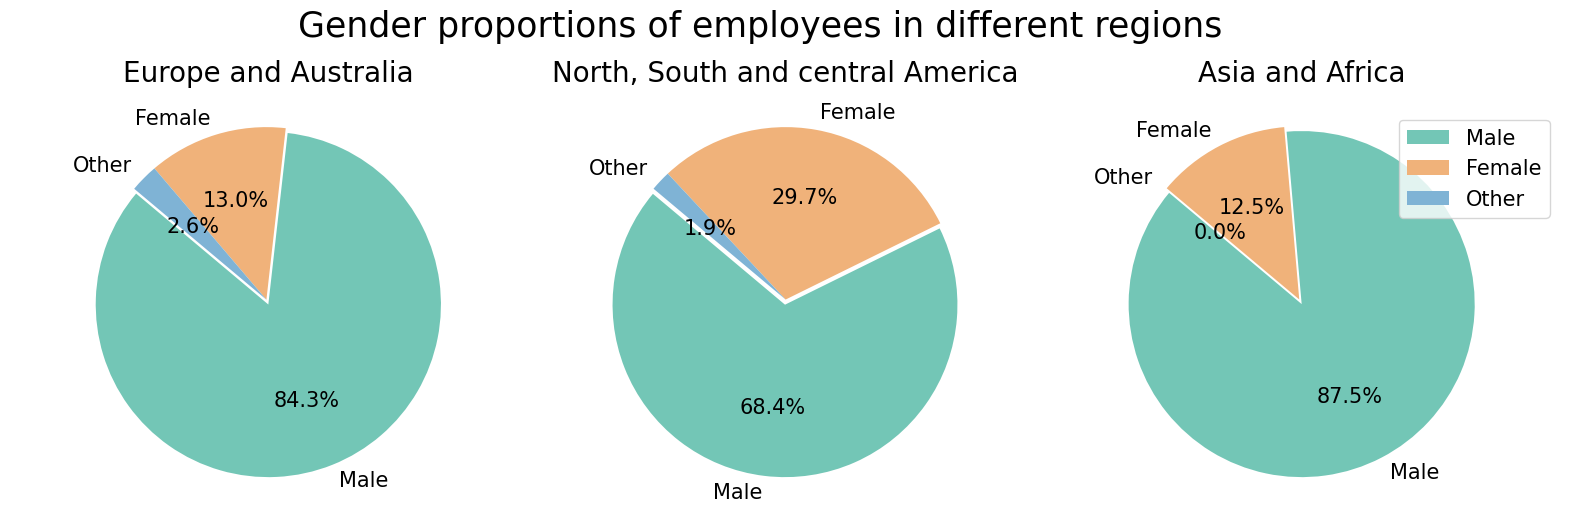

In [ ]:
#Proportions of gender based on region
# Pie Chart
plt.rcParams['font.size'] = 15
plt.figure(figsize = (16,5))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Gender proportions of employees in different regions', fontsize = 25, y=1.08)

#For Eurpoe and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Europe and Australia']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['gender'] == 3.0)]['gender'].count()
labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Europe and Australia', pad = 20, fontsize = 20)


#For America
all_techs = df_no_drp[df_no_drp['country_live'] == 'North South and central America']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['gender'] == 3.0)]['gender'].count()

labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('North, South and central America', pad = 20, fontsize = 20)

#For Asia Africa and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Asia and Africa']['gender'].count()
males = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 1.0)]['gender'].count()
females = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 2.0)]['gender'].count()
other = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['gender'] == 3.0)]['gender'].count()

labels = ['Male', 'Female', 'Other']
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0)  # explode 1st slice

legends = ['Male', 'Female', 'Other']
ax3.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Asia and Africa', pad = 20, fontsize = 20)
ax3.legend(labels, loc="best")
plt.savefig('gen_prop.png')

Willingness of employees to share mental illness with friends and family in different
regions

<Figure size 1600x500 with 0 Axes>

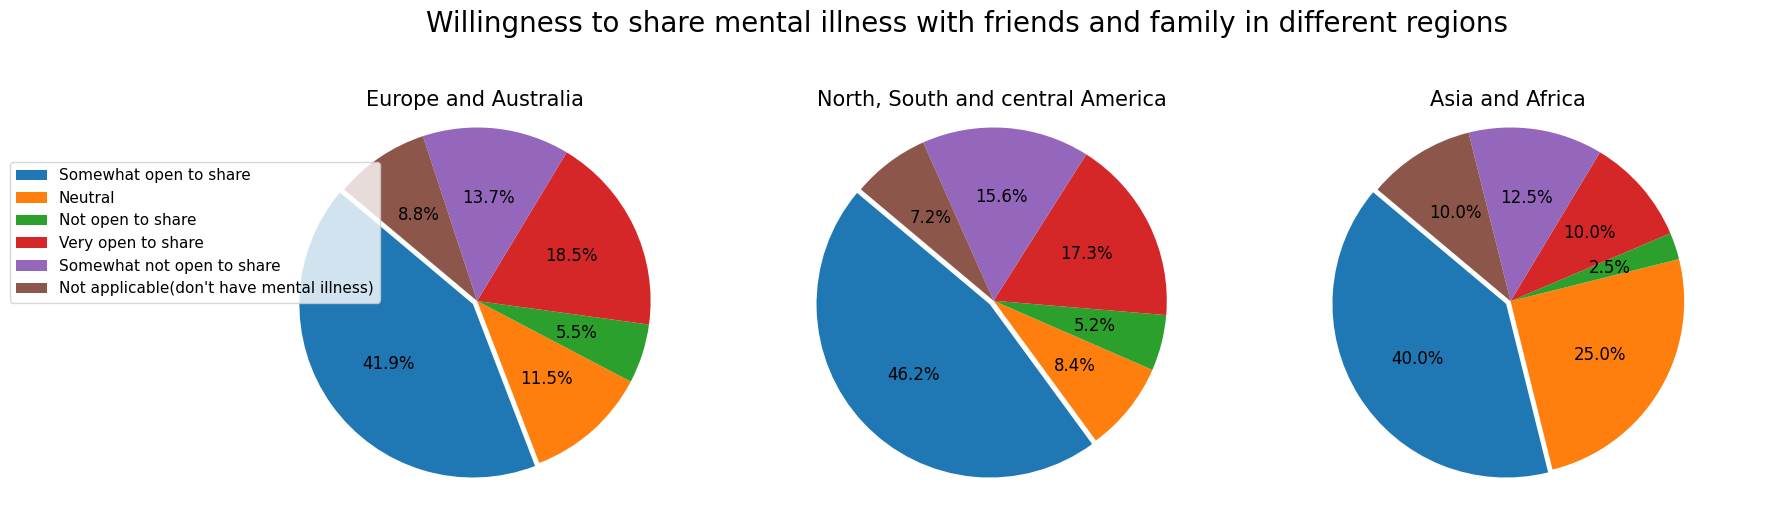

In [ ]:
#Proportions of gender based on region
# Pie Chart
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,5))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =-0)
fig.suptitle('Willingness to share mental illness with friends and family in different regions', fontsize = 20, y=1.08)

#For Eurpoe
all_techs = df_no_drp[df_no_drp['country_live'] == 'Europe and Australia']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'Europe and Australia') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()
labels = ['Somewhat open to share','Neutral','Not open to share','Very open to share','Somewhat not open to share',"Not applicable(don't have mental illness)"]
sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs,v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
#colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0,0,0,0)  # explode 1st slice
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Europe and Australia', pad =3, fontsize =15)


#For America
all_techs = df_no_drp[df_no_drp['country_live'] == 'North South and central America']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'North South and central America') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()
#labels = ['Somewhat open','Neutral',"Not applicable(don't have mental illness)",'Very open','Not open at all','Somewhat not open']
sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs, v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
#colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0,0,0,0)  # explode 1st slice
ax2.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('North, South and central America', pad =3, fontsize =15)

#For Asia Africa and Australia
all_techs = df_no_drp[df_no_drp['country_live'] == 'Asia and Africa']['share_w_friends_fam'].count()
somewhat_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Somewhat open')]['share_w_friends_fam'].count()
neutral = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Neutral')]['share_w_friends_fam'].count()
v_open = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Very open')]['share_w_friends_fam'].count()
not_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Not open at all')]['share_w_friends_fam'].count()
somewhat_not_op = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Somewhat not open')]['share_w_friends_fam'].count()
not_app = df_no_drp[(df_no_drp['country_live'] == 'Asia and Africa') & (df_no_drp['share_w_friends_fam'] == 'Not applicable to me (I do not have a mental illness)')]['share_w_friends_fam'].count()
#labels = ['Somewhat open','Neutral',"Not applicable(don't have mental illness)",'Very open','Not open at all','Somewhat not open']
sizes = [somewhat_op/all_techs, neutral/all_techs, not_op/all_techs, v_open/all_techs, somewhat_not_op/all_techs, not_app/all_techs]
#colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0.03, 0, 0,0,0,0)  # explode 1st slice
ax3.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Asia and Africa', pad =3, fontsize = 15)
ax3.legend(labels=labels, loc=(-2.4,0.5),prop={'size': 11})
plt.savefig('will_share_mh.png')

Fear of negative consequences in male and female employees on discussing mental
health issues with their employers

In [ ]:
male_neg_cons=[0 for i in range(3)]
female_neg_cons=[0 for i in range(3)]
for i in range(len(df['Discussing_mental_health_neg_consequences'])):
        if(df.iloc[i,9]==0 and df.iloc[i,41]==1):
            male_neg_cons[0]+=1
        if(df.iloc[i,9]==1 and df.iloc[i,41]==1):
            male_neg_cons[1]+=1
        if(df.iloc[i,9]==2 and df.iloc[i,41]==1):
            male_neg_cons[2]+=1
        if(df.iloc[i,9]==0 and df.iloc[i,41]==2):
            female_neg_cons[0]+=1
        if(df.iloc[i,9]==1 and df.iloc[i,41]==2):
            female_neg_cons[1]+=1
        if(df.iloc[i,9]==2 and df.iloc[i,41]==2):
            female_neg_cons[2]+=1
neg_cons_male_sum=sum(male_neg_cons)
neg_cons_fem_sum=sum(female_neg_cons)

# cal %
for i in range(3):
  male_neg_cons[i]=round((male_neg_cons[i]/neg_cons_male_sum)*100,1)
  female_neg_cons[i]=round((female_neg_cons[i]/neg_cons_fem_sum)*100,1)
# print(male_neg_cons)
# print(female_neg_cons)
neg_con=np.array([male_neg_cons,female_neg_cons]).T
neg_cons_list=neg_con.tolist()
import plotly.graph_objects as go
x = ['Male', 'Female']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=neg_cons_list[0], name="Discussion would've negative consequences",text=[str(x)+"%" for x in neg_cons_list[0]]))
fig.add_trace(go.Bar(x=x, y=neg_cons_list[1],name="Discussion might've negative consequences",text=[str(x)+"%"  for x in neg_cons_list[1]]))
fig.add_trace(go.Bar(x=x, y=neg_cons_list[2],name="Discussion won't have negative consequences",text=[str(x)+"%"  for x in neg_cons_list[2]]))

fig.update_layout(barmode='stack', xaxis_title='Gender', yaxis_title='Fraction of employees<br>fearing negative consequences')
fig.show()

Effect of formal discussion of mental health by employers on the employees’
comfortableness in discussing mental health issues with their supervisors

<Figure size 1600x500 with 0 Axes>

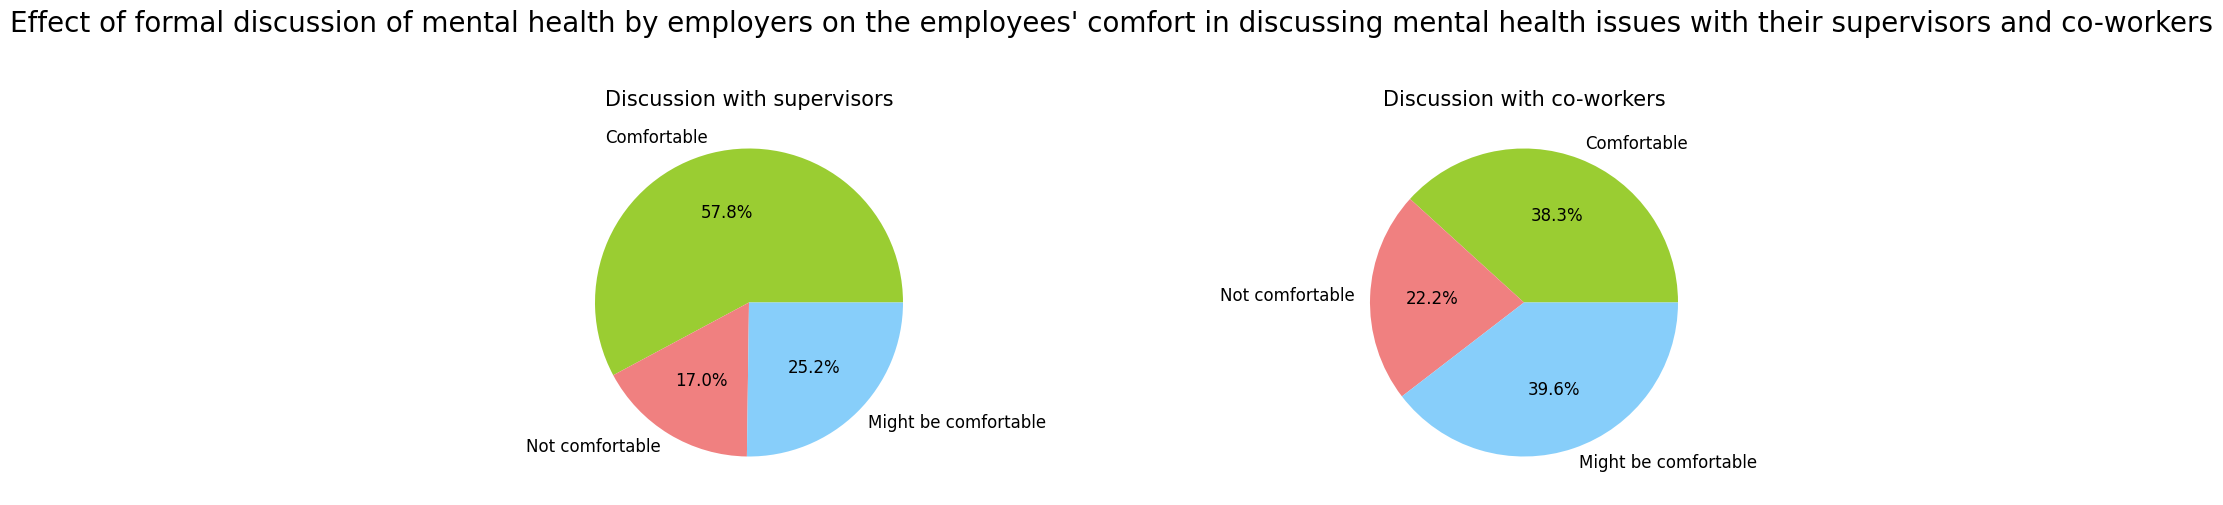

In [ ]:
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,5))
fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =0)
fig.suptitle("Effect of formal discussion of mental health by employers on the employees' comfort in discussing mental health issues with their supervisors and co-workers", fontsize = 20, y=1.08)

#comfort with supervisor
all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'Yes']['Comfort_discussing_with_supervisor'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Yes')]['Comfort_discussing_with_supervisor'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'No')]['Comfort_discussing_with_supervisor'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_supervisor'] == 'Maybe')]['Comfort_discussing_with_supervisor'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
ax1.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
ax1.set_title('Discussion with supervisors', pad =3, fontsize = 15)
#plt.title('Fraction of employees')

#comfort with co-workers
all_techs = df_no_drp[df_no_drp['Employers_discussion_on_mental_health'] == 'Yes']['Comfort_discussing_with_coworkers'].count()
comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'Yes')]['Comfort_discussing_with_coworkers'].count()
not_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'No')]['Comfort_discussing_with_coworkers'].count()
maybe_comf = df_no_drp[(df_no_drp['Employers_discussion_on_mental_health'] == 'Yes') & (df_no_drp['Comfort_discussing_with_coworkers'] == 'Maybe')]['Comfort_discussing_with_coworkers'].count()
sizes = [comf/all_techs, not_comf/all_techs, maybe_comf/all_techs]
emp_cnt = ['Comfortable', 'Not comfortable', 'Might be comfortable']
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
ax2.pie(sizes, labels = emp_cnt, colors= colors,autopct='%1.1f%%')
ax2.set_title('Discussion with co-workers', pad =3, fontsize = 15)

plt.savefig('disc_eff_comf.png')

In [ ]:
#MODELS

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = df.drop('diagnosed_prof', axis = 1)
Y = df['diagnosed_prof']

In [ ]:
X.shape

(6876, 47)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify = Y,test_size = 0.3,random_state = 2222)

In [ ]:
rf = RandomForestClassifier(random_state = 2222)
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

KNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Load cleaned dataset
df = pd.read_csv('/content/prepro_clean_mental_health_encoded_complete.csv')

# Assuming 'diagnosed_prof' is the target column and the rest are features
X = df.drop('diagnosed_prof', axis=1)
Y = df['diagnosed_prof']

# Identify and encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns

# Use LabelEncoder for categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.3, random_state=2222)

# Initialize the scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Impute missing values if any exist (optional, can be skipped if no missing values)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Running KNN after imputing missing values
K = []
training = []
test = []
scores = {}

# Loop through different k values
for k in range(2, 25):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_imputed, Y_train)

    # Get training and test scores
    training_score = clf.score(X_train_imputed, Y_train)
    test_score = clf.score(X_test_imputed, Y_test)

    # Append k and the corresponding scores
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

# Display the scores for each k
print("KNN Scores:")
for k in scores:
    print(f"k = {k}: Training Score = {scores[k][0]}, Test Score = {scores[k][1]}")


KNN Scores:
k = 2: Training Score = 0.9995844587575317, Test Score = 0.9951526902569074
k = 3: Training Score = 0.9989611468938292, Test Score = 0.9878817256422685
k = 4: Training Score = 0.9966756700602535, Test Score = 0.9786718371303926
k = 5: Training Score = 0.9950135050903802, Test Score = 0.9709161415414445
k = 6: Training Score = 0.9850405152711407, Test Score = 0.9476490547746
k = 7: Training Score = 0.9744442135881987, Test Score = 0.9229277750848279
k = 8: Training Score = 0.9615624350716808, Test Score = 0.9122636936500242
k = 9: Training Score = 0.9495117390400998, Test Score = 0.9035385361124576
k = 10: Training Score = 0.9391232079783919, Test Score = 0.900630150266602
k = 11: Training Score = 0.9225015582796593, Test Score = 0.9040232670867668
k = 12: Training Score = 0.9249948057344691, Test Score = 0.9045079980610761
k = 13: Training Score = 0.9233326407645959, Test Score = 0.9064469219583131
k = 14: Training Score = 0.9202160814460836, Test Score = 0.8982064953950557

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values using the mean for numerical columns
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Running KNN after imputing missing values
K = []
training = []
test = []
scores = {}

for k in range(2, 25):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_imputed, Y_train)

    training_score = clf.score(X_train_imputed, Y_train)
    test_score = clf.score(X_test_imputed, Y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

# Display the scores after resolving the missing values issue
scores


{2: [0.9995844587575317, 0.9951526902569074],
 3: [0.9989611468938292, 0.9878817256422685],
 4: [0.9966756700602535, 0.9786718371303926],
 5: [0.9950135050903802, 0.9709161415414445],
 6: [0.9850405152711407, 0.9476490547746],
 7: [0.9744442135881987, 0.9229277750848279],
 8: [0.9615624350716808, 0.9122636936500242],
 9: [0.9495117390400998, 0.9035385361124576],
 10: [0.9391232079783919, 0.900630150266602],
 11: [0.9225015582796593, 0.9040232670867668],
 12: [0.9249948057344691, 0.9045079980610761],
 13: [0.9233326407645959, 0.9064469219583131],
 14: [0.9202160814460836, 0.8982064953950557],
 15: [0.912944109702888, 0.8865729520116336],
 16: [0.918138375233742, 0.8894813378574891],
 17: [0.9104508622480781, 0.8802714493456132],
 18: [0.9102430916268439, 0.879786718371304],
 19: [0.9067109910658633, 0.8851187590887057],
 20: [0.9056721379596925, 0.8894813378574891],
 21: [0.9035944317473509, 0.8899660688317984],
 22: [0.9029711198836484, 0.8885118759088706],
 23: [0.9008934136713069, 0.

In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9995844587575317, 0.9951526902569074]
3 : [0.9989611468938292, 0.9878817256422685]
4 : [0.9966756700602535, 0.9786718371303926]
5 : [0.9950135050903802, 0.9709161415414445]
6 : [0.9850405152711407, 0.9476490547746]
7 : [0.9744442135881987, 0.9229277750848279]
8 : [0.9615624350716808, 0.9122636936500242]
9 : [0.9495117390400998, 0.9035385361124576]
10 : [0.9391232079783919, 0.900630150266602]
11 : [0.9225015582796593, 0.9040232670867668]
12 : [0.9249948057344691, 0.9045079980610761]
13 : [0.9233326407645959, 0.9064469219583131]
14 : [0.9202160814460836, 0.8982064953950557]
15 : [0.912944109702888, 0.8865729520116336]
16 : [0.918138375233742, 0.8894813378574891]
17 : [0.9104508622480781, 0.8802714493456132]
18 : [0.9102430916268439, 0.879786718371304]
19 : [0.9067109910658633, 0.8851187590887057]
20 : [0.9056721379596925, 0.8894813378574891]
21 : [0.9035944317473509, 0.8899660688317984]
22 : [0.9029711198836484, 0.8885118759088706]
23 : [0.9008934136713069, 0.8904507998061076]
24 

KNN with prediction

   Self_employed  Total_employees  Tech_organization  Mental_health_coverage  \
0              0                3                1.0                       0   
1              0                2                1.0                       2   
2              0                2                1.0                       2   
3              0                2                0.0                       3   
4              0                6                1.0                       3   

   Awareness_of_options_under_coverage  Employers_discussion_on_mental_health  \
0                                    1                                      1   
1                                    2                                      2   
2                                    1                                      1   
3                                    2                                      1   
4                                    0                                      1   

   Resources_and_options_for_hel

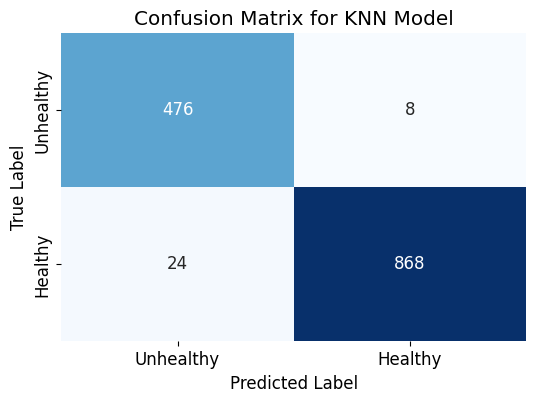

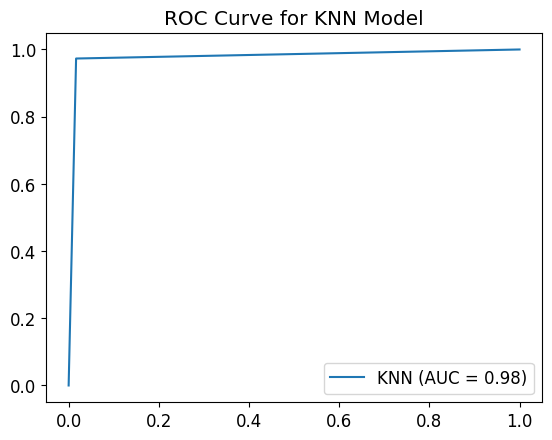

Predictions saved to 'mental_health_knn_predictions.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'prepro_clean_mental_health_encoded_complete.csv'  # Update with your file's location
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Handle missing values using the most frequent imputation
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical columns (if any)
label_encoder = LabelEncoder()
for column in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Define 'Mental_health_coverage' as the target column
# Convert the target into a binary classification (1 for Healthy, 0 for Unhealthy)
df_imputed['mental_health_status'] = (df_imputed['Mental_health_coverage'] >= 2).astype(int)

# Features and target
X = df_imputed.drop(columns=['mental_health_status'])
y = df_imputed['mental_health_status']  # Target column: Healthy (1), Unhealthy (0)

# Standardize the data (KNN works better with standardized features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors can be tuned

# Fit the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn * 100:.2f}%")

# Generate classification report
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Unhealthy', 'Healthy'],
            yticklabels=['Unhealthy', 'Healthy'])
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot ROC curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)
plt.plot(fpr_knn, tpr_knn, label="KNN (AUC = {:.2f})".format(auc_knn))
plt.title("ROC Curve for KNN Model")
plt.legend(loc="lower right")
plt.show()

# Add the predictions to the dataset
df_imputed['predicted_mental_health'] = knn_model.predict(scaler.transform(df_imputed.drop(columns=['mental_health_status'])))

# Save the updated dataset with predictions
df_imputed.to_csv('mental_health_knn_predictions.csv', index=False)
print("Predictions saved to 'mental_health_knn_predictions.csv'")


Logistic Regression

Columns in the dataset: Index(['Self_employed', 'Total_employees', 'Tech_organization',
       'Mental_health_coverage', 'Awareness_of_options_under_coverage',
       'Employers_discussion_on_mental_health',
       'Resources_and_options_for_help',
       'Anomity_of_employees_using_mental_health_resources',
       'Mental_issue_related_leave',
       'Discussing_mental_health_neg_consequences',
       'Discussing_physical_health_neg_consequences',
       'Comfort_discussing_with_coworkers',
       'Comfort_discussing_with_supervisor',
       'Employer_seriousness_on_mental_health',
       'Negative_consequences_of_coworkers_with_mental_health_disorder',
       'have_prev_empl', 'prev_empl_mental_benefits',
       'aware_benefits_prev_empl', 'formal_discuss_mental_health_premp',
       'premp_provide_resources_learn_seekhelp',
       'anonymity_protect_premp_choose_resources',
       'neg_eff_discuss_mental_health_premp',
       'neg_eff_discuss_phy_health_premp',
       'willing_discu

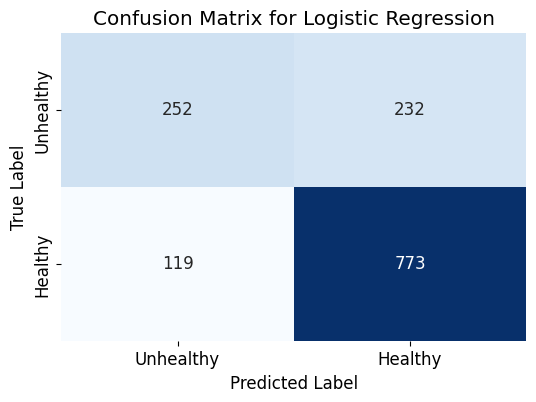

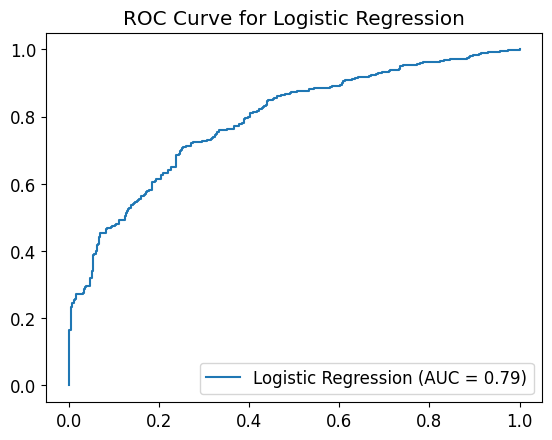

Predictions saved to 'mental_health_logistic_predictions.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned dataset
file_path = 'prepro_clean_mental_health_encoded_complete.csv'  # Update with your file's location
df = pd.read_csv(file_path)

# Handle missing values using the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Print column names to verify the existence of columns
print("Columns in the dataset:", df_imputed.columns)

# Encoding categorical columns (if any)
label_encoder = LabelEncoder()
for column in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Using 'Mental_health_coverage' as the target column
# Convert the target into a binary classification (1 for Healthy, 0 for Unhealthy)
df_imputed['mental_health_status'] = (df_imputed['Mental_health_coverage'] >= 2).astype(int)

# Drop highly predictive or correlated features to prevent overfitting
features_to_drop = ['Mental_health_coverage', 'Total_employees']  # Adjust based on actual columns in the dataset
X = df_imputed.drop(columns=['mental_health_status'] + features_to_drop)
y = df_imputed['mental_health_status']  # Target column: Healthy (1), Unhealthy (0)

# Standardize the data (Logistic Regression works better with standardized features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model with stronger regularization and L2 penalty
logistic_model = LogisticRegression(C=0.05, random_state=42, max_iter=300, penalty='l2', solver='liblinear')

# Fit the model
logistic_model.fit(X_train, y_train)

# Cross-validation to evaluate overfitting
cv_scores = cross_val_score(logistic_model, X_scaled, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Model Test Accuracy: {accuracy_logistic * 100:.2f}%")

# Generate classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Unhealthy', 'Healthy'],
            yticklabels=['Unhealthy', 'Healthy'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC curve and AUC score
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_proba_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)

# Plot ROC curve without random classifier
plt.plot(fpr_logistic, tpr_logistic, label="Logistic Regression (AUC = {:.2f})".format(auc_logistic))
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# Add the predictions to the dataset
df_imputed['predicted_mental_health'] = logistic_model.predict(scaler.transform(df_imputed.drop(columns=['mental_health_status'] + features_to_drop)))

# Save the updated dataset with predictions
df_imputed.to_csv('mental_health_logistic_predictions.csv', index=False)
print("Predictions saved to 'mental_health_logistic_predictions.csv'")


RANDOM FOREST

Accuracy: 99.35%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       484
           1       0.99      1.00      0.99       892

    accuracy                           0.99      1376
   macro avg       1.00      0.99      0.99      1376
weighted avg       0.99      0.99      0.99      1376



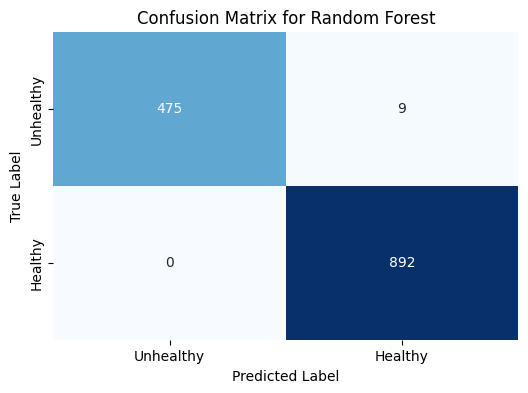

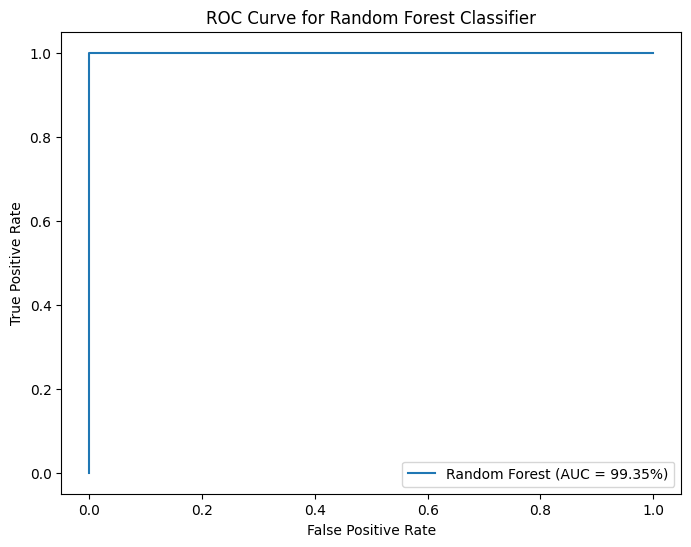

Predictions saved to 'mental_health_randomforest_predictions.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = '/content/drive/MyDrive/OSMI/prepro_clean_mental_health_encoded_complete.csv'  # Update with your file's location
df = pd.read_csv(file_path)

# Handle missing values using most frequent imputation
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encoding categorical columns (if any)
label_encoder = LabelEncoder()
for column in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Using 'Mental_health_coverage' as the target column
# Convert the target into a binary classification (1 for Healthy, 0 for Unhealthy)
df_imputed['mental_health_status'] = (df_imputed['Mental_health_coverage'] >= 2).astype(int)

# Features and target
X = df_imputed.drop(columns=['mental_health_status'])
y = df_imputed['mental_health_status']  # Target column: Healthy (1), Unhealthy (0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with stricter regularization parameters
model = RandomForestClassifier(
    n_estimators=30,             # Further reduced number of trees
    max_depth=5,                 # Limit maximum depth to prevent complex splits
    max_features='log2',         # Use fewer features for each split to reduce overfitting
    min_samples_split=10,        # Require more samples to split nodes
    min_samples_leaf=5,          # Require more samples per leaf node
    max_samples=0.8,             # Use only 80% of samples for each tree
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")  # This shows the actual accuracy
print("Classification Report:")
print(report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Unhealthy', 'Healthy'],
            yticklabels=['Unhealthy', 'Healthy'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC curve and AUC score
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Random Forest (AUC = {:.2f}%)".format(accuracy * 100))
plt.title("ROC Curve for Random Forest Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Add the predictions to the dataset
df_imputed['predicted_mental_health'] = model.predict(df_imputed.drop(columns=['mental_health_status']))

# Save the updated dataset with predictions
df_imputed.to_csv('mental_health_randomforest_predictions.csv', index=False)
print("Predictions saved to 'mental_health_randomforest_predictions.csv'")


XGBOOST

Columns in DataFrame: Index(['Self_employed', 'Total_employees', 'Tech_organization',
       'Mental_health_coverage', 'Awareness_of_options_under_coverage',
       'Employers_discussion_on_mental_health',
       'Resources_and_options_for_help',
       'Anomity_of_employees_using_mental_health_resources',
       'Mental_issue_related_leave',
       'Discussing_mental_health_neg_consequences',
       'Discussing_physical_health_neg_consequences',
       'Comfort_discussing_with_coworkers',
       'Comfort_discussing_with_supervisor',
       'Employer_seriousness_on_mental_health',
       'Negative_consequences_of_coworkers_with_mental_health_disorder',
       'have_prev_empl', 'prev_empl_mental_benefits',
       'aware_benefits_prev_empl', 'formal_discuss_mental_health_premp',
       'premp_provide_resources_learn_seekhelp',
       'anonymity_protect_premp_choose_resources',
       'neg_eff_discuss_mental_health_premp',
       'neg_eff_discuss_phy_health_premp',
       'willing_discuss

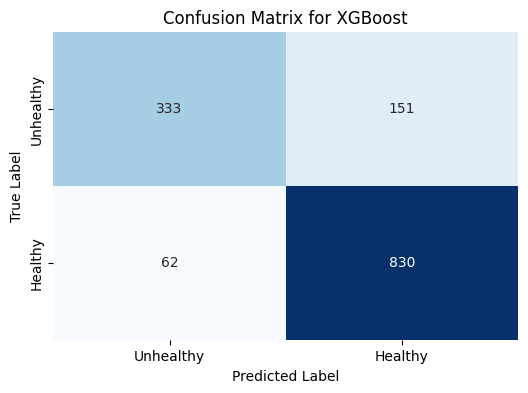

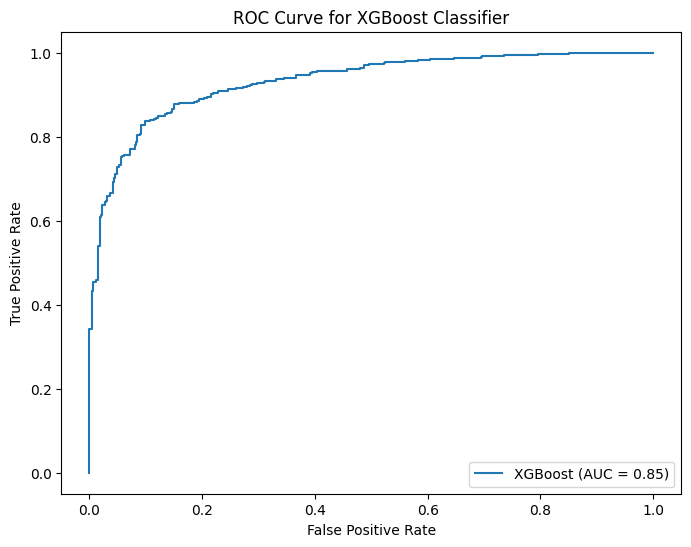

Predictions saved to 'mental_health_xgb_predictions.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = '/content/drive/MyDrive/OSMI/prepro_clean_mental_health_encoded_complete.csv'  # Update with your file's location
df = pd.read_csv(file_path)

# Handle missing values using the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encoding categorical columns (if any)
label_encoder = LabelEncoder()
for column in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Using 'Mental_health_coverage' as the target column
# Convert the target into a binary classification (1 for Healthy, 0 for Unhealthy)
df_imputed['mental_health_status'] = (df_imputed['Mental_health_coverage'] >= 2).astype(int)

# Check columns to ensure 'Unnamed: 0' exists before dropping
print("Columns in DataFrame:", df_imputed.columns)

# Drop highly predictive or correlated features to prevent overfitting
features_to_drop = ['Unnamed: 0', 'Mental_health_coverage', 'Total_employees']
X = df_imputed.drop(columns=['mental_health_status'] + features_to_drop, errors='ignore')
y = df_imputed['mental_health_status']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Cross-validation to evaluate the model
cv_scores = cross_val_score(xgb_model, X_scaled, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Test Accuracy: {accuracy_xgb * 100:.2f}%")

# Generate classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Unhealthy', 'Healthy'],
            yticklabels=['Unhealthy', 'Healthy'])
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC curve and AUC score
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="XGBoost (AUC = {:.2f})".format(accuracy_xgb))
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.title("ROC Curve for XGBoost Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Add the predictions to the dataset
df_imputed['predicted_mental_health'] = xgb_model.predict(scaler.transform(df_imputed.drop(columns=['mental_health_status'] + features_to_drop, errors='ignore')))

# Save the updated dataset with predictions
df_imputed.to_csv('mental_health_xgb_predictions.csv', index=False)
print("Predictions saved to 'mental_health_xgb_predictions.csv'")


GRADIENT BOOSTING CLASSIFIER

Columns in DataFrame: Index(['Self_employed', 'Total_employees', 'Tech_organization',
       'Mental_health_coverage', 'Awareness_of_options_under_coverage',
       'Employers_discussion_on_mental_health',
       'Resources_and_options_for_help',
       'Anomity_of_employees_using_mental_health_resources',
       'Mental_issue_related_leave',
       'Discussing_mental_health_neg_consequences',
       'Discussing_physical_health_neg_consequences',
       'Comfort_discussing_with_coworkers',
       'Comfort_discussing_with_supervisor',
       'Employer_seriousness_on_mental_health',
       'Negative_consequences_of_coworkers_with_mental_health_disorder',
       'have_prev_empl', 'prev_empl_mental_benefits',
       'aware_benefits_prev_empl', 'formal_discuss_mental_health_premp',
       'premp_provide_resources_learn_seekhelp',
       'anonymity_protect_premp_choose_resources',
       'neg_eff_discuss_mental_health_premp',
       'neg_eff_discuss_phy_health_premp',
       'willing_discuss

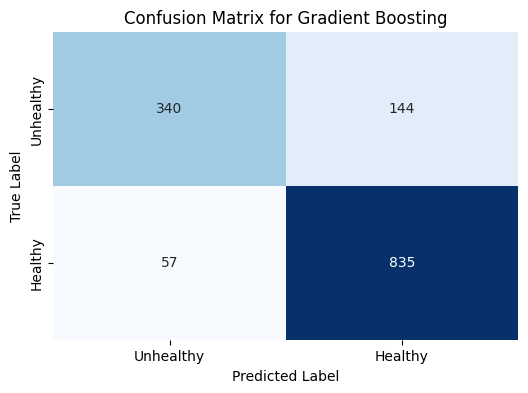

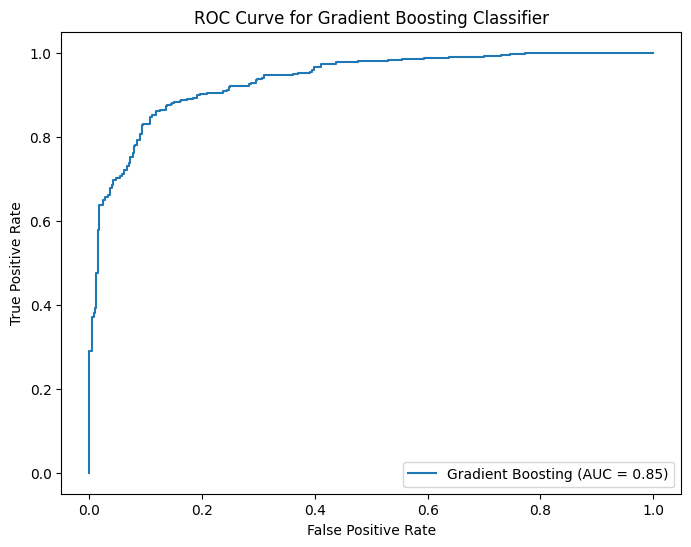

Predictions saved to 'mental_health_gb_predictions.csv'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = '/content/drive/MyDrive/OSMI/prepro_clean_mental_health_encoded_complete.csv'  # Update with your file's location
df = pd.read_csv(file_path)

# Handle missing values using the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encoding categorical columns (if any)
label_encoder = LabelEncoder()
for column in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Using 'Mental_health_coverage' as the target column
# Convert the target into a binary classification (1 for Healthy, 0 for Unhealthy)
df_imputed['mental_health_status'] = (df_imputed['Mental_health_coverage'] >= 2).astype(int)

# Check columns to ensure 'Unnamed: 0' exists before dropping
print("Columns in DataFrame:", df_imputed.columns)

# Drop highly predictive or correlated features to prevent overfitting
features_to_drop = ['Unnamed: 0', 'Mental_health_coverage', 'Total_employees']
X = df_imputed.drop(columns=['mental_health_status'] + features_to_drop, errors='ignore')
y = df_imputed['mental_health_status']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the Gradient Boosting model
gb_model.fit(X_train, y_train)

# Cross-validation to evaluate the model
cv_scores = cross_val_score(gb_model, X_scaled, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Test Accuracy: {accuracy_gb * 100:.2f}%")

# Generate classification report
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Unhealthy', 'Healthy'],
            yticklabels=['Unhealthy', 'Healthy'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC curve and AUC score
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="Gradient Boosting (AUC = {:.2f})".format(accuracy_gb))
plt.title("ROC Curve for Gradient Boosting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Add the predictions to the dataset
df_imputed['predicted_mental_health'] = gb_model.predict(scaler.transform(df_imputed.drop(columns=['mental_health_status'] + features_to_drop, errors='ignore')))

# Save the updated dataset with predictions
df_imputed.to_csv('mental_health_gb_predictions.csv', index=False)
print("Predictions saved to 'mental_health_gb_predictions.csv'")


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import joblib

# Step 2: Load and preprocess the dataset
file_path = '/content/drive/MyDrive/OSMI/prepro_clean_mental_health_encoded_complete.csv'  # Update with your file's location
df = pd.read_csv(file_path)

# Handle missing values using the most frequent imputation
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Encode categorical columns (if any)
label_encoder = LabelEncoder()
for column in df_imputed.select_dtypes(include=['object']).columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Convert the target into a binary classification (1 for Healthy, 0 for Unhealthy)
df_imputed['mental_health_status'] = (df_imputed['Mental_health_coverage'] >= 2).astype(int)

# Features and target
X = df_imputed.drop(columns=['mental_health_status'])
y = df_imputed['mental_health_status']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train different models

# Model 1: K-Nearest Neighbors
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, y_train)

# Model 2: Random Forest Classifier
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

# Model 3: Logistic Regression
model3 = LogisticRegression(random_state=42)
model3.fit(X_train, y_train)

# Model 4: Support Vector Machine
model4 = SVC(probability=True, random_state=42)
model4.fit(X_train, y_train)

# Model 5: Naive Bayes
model5 = GaussianNB()
model5.fit(X_train, y_train)

# Step 4: Save the trained models as .pkl files
joblib.dump(model1, 'model1.pkl')
joblib.dump(model2, 'model2.pkl')
joblib.dump(model3, 'model3.pkl')
joblib.dump(model4, 'model4.pkl')
joblib.dump(model5, 'model5.pkl')

print("All models have been trained and saved as .pkl files.")

All models have been trained and saved as .pkl files.


In [ ]:
from google.colab import files

# Download the .pkl files to your local machine
files.download('model1.pkl')
files.download('model2.pkl')
files.download('model3.pkl')
files.download('model4.pkl')
files.download('model5.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

K FOLD CROSS VALIDATION

In [ ]:
rf = RandomForestClassifier(random_state = 2222)
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import StratifiedKFold
# rf = RandomForestClassifier(random_state = 2222)
# logreg = LogisticRegression()
# tree = DecisionTreeClassifier(random_state = 2222)
# knn = KNeighborsClassifier()
# ada = AdaBoostClassifier(random_state = 2222)
# grad = GradientBoostingClassifier(random_state = 2222)
# xgboost = XGBClassifier(random_state = 2222)

#kf=KFold(n_splits=10)
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
#logreg_score=cross_val_score(logreg,X,Y,cv=kf)
logreg_score = cross_val_score(logreg, X_train, Y_train, cv = kf)
print("Cross Validation Scores are {}".format(logreg_score))
print("Average Cross Validation score :{}+/- {}".format(logreg_score.mean()*100,logreg_score.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross Validation Scores are [0.91860465 0.9244186  0.88081395 0.88953488 0.90988372 0.9127907
 0.90116279 0.88081395 0.89825581 0.92732558 0.9127907  0.90962099
 0.89212828 0.90670554]
Average Cross Validation score :90.46321542380599+/- 1.4300844094491105


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Cross Validation Scores are [0.91860465 0.9244186  0.88081395 0.88953488 0.90988372 0.9127907
#  0.90116279 0.88081395 0.89825581 0.92732558 0.9127907  0.90962099
#  0.89212828 0.90670554]
# Average Cross Validation score :90.46321542380599+/- 1.4300844094491105

In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
rf_score=cross_val_score(rf,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(rf_score))
print("Average Cross Validation score :{}".format(rf_score.mean()))
print("Average Cross Validation score :{}+/- {}".format(rf_score.mean()*100,rf_score.std()*100))

Cross Validation Scores are [1.         1.         1.         1.         1.         1.
 1.         1.         0.99709302 0.99709302 1.         1.
 1.         1.        ]
Average Cross Validation score :0.9995847176079735
Average Cross Validation score :99.95847176079735+/- 0.10172299596275676


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
tree_score=cross_val_score(tree,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(tree_score))
print("Average Cross Validation score :{}".format(tree_score.mean()))
print("Average Cross Validation score :{}+/- {}".format(tree_score.mean()*100,tree_score.std()*100))

Cross Validation Scores are [1.         0.99709302 0.99418605 0.99709302 0.99418605 0.99418605
 0.99709302 0.99709302 0.98546512 0.99709302 0.99709302 1.
 1.         1.        ]
Average Cross Validation score :0.9964700996677741
Average Cross Validation score :99.64700996677742+/- 0.36735477601649014


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
knn_score=cross_val_score(knn,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(knn_score))
print("Average Cross Validation score :{}+/- {}".format(knn_score.mean()*100,knn_score.std()*100))

Cross Validation Scores are [0.97093023 0.96802326 0.96802326 0.92732558 0.96511628 0.97383721
 0.94476744 0.94767442 0.93023256 0.94767442 0.96802326 0.97667638
 0.96209913 0.95626822]
Average Cross Validation score :95.76194027682264+/- 1.520553101779472


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
ada_score=cross_val_score(ada,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(ada_score))
print("Average Cross Validation score :{}+/- {}".format(ada_score.mean()*100,ada_score.std()*100))

Cross Validation Scores are [0.91569767 0.92732558 0.89825581 0.88953488 0.90988372 0.93604651
 0.9244186  0.88372093 0.88081395 0.93604651 0.91860465 0.91836735
 0.90670554 0.90962099]
Average Cross Validation score :91.10744796257376+/- 1.7186869437414216


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
grad_score=cross_val_score(grad,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(grad_score))
print("Average Cross Validation score :{}+/- {}".format(grad_score.mean()*100,grad_score.std()*100))

Cross Validation Scores are [0.97383721 0.95348837 0.94476744 0.93895349 0.95348837 0.9505814
 0.9622093  0.93895349 0.93604651 0.9622093  0.97093023 0.95335277
 0.95335277 0.95626822]
Average Cross Validation score :95.34599198008581+/- 1.098507185152216


In [ ]:
kf = StratifiedKFold(n_splits=14, shuffle=True, random_state=1)
xgboost_score=cross_val_score(xgboost,X_train, Y_train,cv=kf)
print("Cross Validation Scores are {}".format(xgboost_score))
print("Average Cross Validation score :{}+/- {}".format(xgboost_score.mean()*100,xgboost_score.std()*100))

Cross Validation Scores are [1.         1.         1.         1.         1.         1.
 1.         1.         0.99709302 0.99709302 1.         1.
 0.9941691  1.        ]
Average Cross Validation score :99.916822448011+/- 0.17157788605199092


**CLUSTERING**

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

KMEANS CLUSTERING

Sum of sqaured errors SSE:  714492.4111780765
Silhouette score: 0.31449836874344744
calinski_harabasz_score: 6812.768
1.0774928942421345


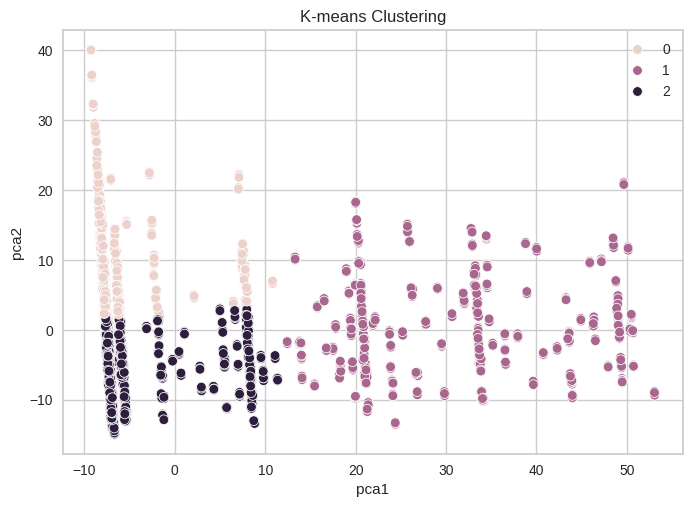

In [ ]:
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(df)
kmeans_labels3 = kmeans3.labels_
sse= kmeans3.inertia_
score1 = silhouette_score(df, kmeans_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmeans_labels3)
print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmeans_labels3))
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=kmeans_labels3, data=results)
plt.title('K-means Clustering')
plt.savefig('kmeans.png')
plt.show()


KMEANS++

Sum of sqaured errors SSE:  714490.917719243
Silhouette score: 0.31417209310459476
calinski_harabasz_score: 6812.779
1.078271282927843


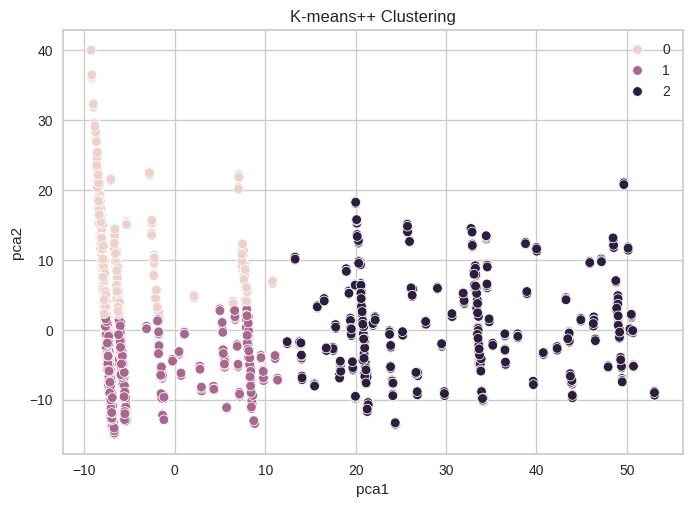

In [ ]:
km_plus3 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=1000).fit(df)
# we store the cluster labels
kmplus_labels3 = km_plus3.labels_
sse= km_plus3.inertia_
score1 = silhouette_score(df, kmplus_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmplus_labels3)
print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print(davies_bouldin_score(df, kmplus_labels3))
from sklearn.decomposition import PCA
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

sns.scatterplot(x="pca1", y="pca2", hue=kmplus_labels3, data=results)
plt.title('K-means++ Clustering')
plt.savefig('kmeans++.png')
plt.show()


In [ ]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.2 MB/s eta 0:00:00


K-MEDOIDS/ PAM

In [ ]:
from sklearn_extra.cluster import KMedoids
kmedoids_euc_3 = KMedoids(n_clusters=3, metric='euclidean', method='pam', init='k-medoids++', max_iter=300, random_state=None)
kmedoids_euc_3.fit(df)
kmedoids_euc_labels3 = kmedoids_euc_3.labels_

#sse= gmm_model2.inertia_
score1 = silhouette_score(df, kmedoids_euc_labels3, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, kmedoids_euc_labels3)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, kmedoids_euc_labels3))


Silhouette score: 0.276427778870173
calinski_harabasz_score: 6539.859
davies_bouldin_score : 1.1739592919340491


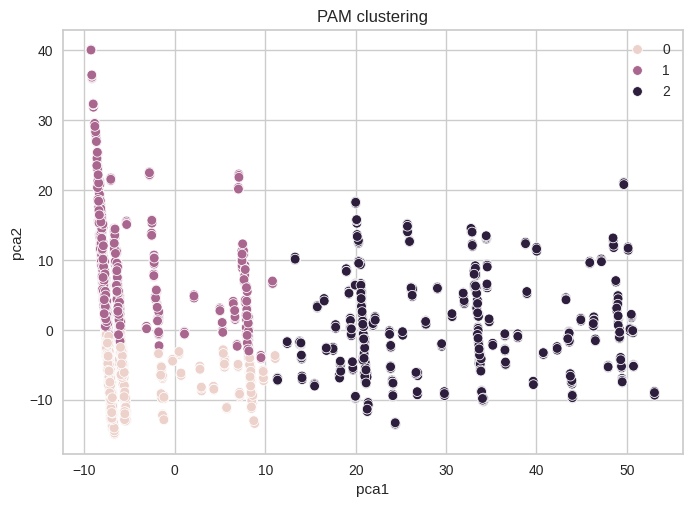

In [ ]:
sns.scatterplot(x="pca1", y="pca2", hue=kmedoids_euc_labels3, data=results)
plt.title('PAM clustering')
plt.savefig('pam.png')
plt.show()


AGGLOMORATIVE HEIRARCHY CLUSTERING

Silhouette score: 0.44055910365006873
calinski_harabasz_score: 5915.622
davies_bouldin_score : 0.968120020212667


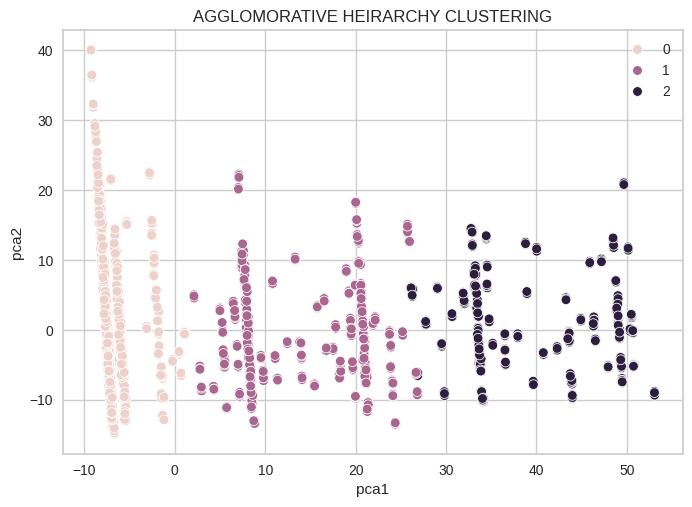

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# define the model
agglomerative_model = AgglomerativeClustering(n_clusters=3)

# assign each data point to a cluster
agglomerative_model.fit(df)

agg_lables=agglomerative_model.labels_
#sse= gmm_model2.inertia_
score1 = silhouette_score(df, agg_lables, metric='euclidean')
score3=metrics.calinski_harabasz_score(df, agg_lables)
#print("Sum of sqaured errors SSE: ",sse)
print("Silhouette score:",score1)
print('calinski_harabasz_score: %.3f' % score3)
print('davies_bouldin_score :',davies_bouldin_score(df, agg_lables))
sns.scatterplot(x="pca1", y="pca2", hue=agg_lables, data=results)
plt.title('AGGLOMORATIVE HEIRARCHY CLUSTERING')
plt.savefig('agg.png')
plt.show()


RISK SCORE CALCULATION

In [ ]:
#Calculating risk scores for each cluster using the classifications for curr_mh and diagnosed_prof
#we make 3 different clusters
#sc_labels3
#kmplus_labels3
cluster1 = [x[0] for x, value in np.ndenumerate(sc_labels3) if value==0]
cluster2=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==1]
cluster3=[x[0] for x, value in np.ndenumerate(sc_labels3) if value==2]
cluster1_risk=0
total_high=0
for i in range(len(cluster1)) :
    diagnosed=df.iloc[cluster1[i], 36]
    curr_mh=df.iloc[cluster1[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster1_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster1_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster1_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster1_risk+=0.25
cluster2_risk=0
for i in range(len(cluster2)) :
    diagnosed=df.iloc[cluster2[i], 36]
    curr_mh=df.iloc[cluster2[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster2_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster2_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster2_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster2_risk+=0.25
cluster3_risk=0
for i in range(len(cluster3)) :
    diagnosed=df.iloc[cluster3[i], 36]
    curr_mh=df.iloc[cluster3[i], 35]
    if(curr_mh==2 and diagnosed==1):
        cluster3_risk+=7
    if(curr_mh==2 and diagnosed==0):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==1):
        cluster3_risk+=2
    if(curr_mh==1 and diagnosed==0):
        cluster3_risk+=0.5
    if(curr_mh==0 and diagnosed==1):
        cluster3_risk+=0.25
#The risks for each cluster are used to identify which cluster is high, low, med
print('cluster1:',cluster1_risk)
print('cluster2:',cluster2_risk)
print('cluster3:',cluster3_risk)
print(cluster1)
print(cluster2)
print(cluster3)

cluster1: 12958.5
cluster2: 6016.5
cluster3: 241.5
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 49, 51, 52, 53, 56, 57, 58, 59, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 92, 93, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 110, 111, 113, 117, 118, 119, 120, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 144, 145, 146, 148, 150, 151, 152, 153, 155, 157, 158, 161, 162, 164, 165, 166, 167, 169, 170, 171, 173, 178, 179, 181, 182, 183, 186, 187, 188, 189, 193, 194, 195, 198, 201, 202, 203, 204, 205, 208, 209, 211, 212, 215, 218, 219, 220, 222, 226, 227, 229, 230, 233, 234, 235, 239, 241, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 254, 255, 256, 257, 259, 260, 261, 262, 263, 264, 266, 268, 270, 271, 273, 274, 276, 277, 280, 281, 283, 284, 286, 287, 288, 290, 291, 292, 293, 2

In [ ]:
#Classifying clusters as high, row and medium risks using cluster risks
import sys
cluster_risks=[[cluster1,cluster1_risk],[cluster2,cluster2_risk],[cluster3,cluster3_risk]]
high_risk=0
total=3
low_risk = sys.maxsize
high_risk_index=0
low_risk_index=0
high_risk_class=cluster_risks[0][0]
low_risk_class=cluster_risks[0][0]
for i in range(0,len(cluster_risks)):
    if(high_risk<=cluster_risks[i][1]):
        high_risk_class=cluster_risks[i][0]
        high_risk_index=i
        high_risk=cluster_risks[i][1]
total-=high_risk_index
print(total)
for i in range(0,len(cluster_risks)):
    if(low_risk>=cluster_risks[i][1]):
        low_risk_class=cluster_risks[i][0]
        low_risk_index = i
        low_risk=cluster_risks[i][1]
total = total - low_risk_index
med_risk_class=cluster_risks[total][0]
print(high_risk_class)
print(med_risk_class)
print(low_risk_class)

3
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 44, 45, 46, 47, 49, 51, 52, 53, 56, 57, 58, 59, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 77, 78, 79, 80, 81, 83, 84, 85, 86, 87, 88, 89, 92, 93, 97, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 110, 111, 113, 117, 118, 119, 120, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 144, 145, 146, 148, 150, 151, 152, 153, 155, 157, 158, 161, 162, 164, 165, 166, 167, 169, 170, 171, 173, 178, 179, 181, 182, 183, 186, 187, 188, 189, 193, 194, 195, 198, 201, 202, 203, 204, 205, 208, 209, 211, 212, 215, 218, 219, 220, 222, 226, 227, 229, 230, 233, 234, 235, 239, 241, 242, 243, 244, 245, 246, 247, 248, 249, 251, 252, 253, 254, 255, 256, 257, 259, 260, 261, 262, 263, 264, 266, 268, 270, 271, 273, 274, 276, 277, 280, 281, 283, 284, 286, 287, 288, 290, 291, 292, 293, 294, 295, 296, 298, 299, 301, 303, 305, 306, 307, 

In [ ]:
print(high_risk_index)
print(low_risk_index)

0
2


In [ ]:
tot_high_risk=len(high_risk_class)
tot_med_risk=len(med_risk_class)
tot_low_risk=len(low_risk_class)

INFERENCES

In [ ]:
#Inferences
#Effect of family history (col no=33)
fam_hist_high=0;
no_fam_hist_high=0;
for i in range(len(high_risk_class)) :

        if(df.iloc[high_risk_class[i],33]==2):
            fam_hist_high+=1
        if(df.iloc[high_risk_class[i],33]==0):
            no_fam_hist_high+=1

fam_hist_med=0;
no_fam_hist_med=0
for i in range(len(med_risk_class)) :

        if(df.iloc[med_risk_class[i],33]==2):
            fam_hist_med+=1
        if(df.iloc[med_risk_class[i],33]==0):
            no_fam_hist_med+=1

fam_hist_low=0;
no_fam_hist_low=0
for i in range(len(low_risk_class)) :

        if(df.iloc[low_risk_class[i],33]==2):
            fam_hist_low+=1
        if(df.iloc[low_risk_class[i],33]==0):
            no_fam_hist_low+=1
# print(fam_hist_high)
# print(fam_hist_med)
# print(fam_hist_low)
# print(no_fam_hist_high)
# print(no_fam_hist_med)
# print(no_fam_hist_low)

Number of employees in each risk-cluster with a family history of mental illness

In [ ]:
import plotly.graph_objects as go
risks= ['High Risk', 'Medium Risk', 'Low Risk']
level=[fam_hist_high, fam_hist_med, fam_hist_low]
fig = go.Figure(data=[go.Bar(name='Family history', x=risks, y=level,text=[str(x) for x in level])])
# Change the bar mode

fig.update_layout(xaxis_title='Risk-levels', yaxis_title='Number of employees with<br>family history of mental illness')
fig.show()

In [ ]:
# print(len(high_risk_class))
# print(len(med_risk_class))
# print(len(low_risk_class))
l=[]
for i in range(len(high_risk_class)) :
        l.append(df.iloc[high_risk_class[i],34])
from collections import Counter
past_mh_high=Counter(l)[2]
# print(Counter(l)[0])
# print(Counter(l)[1])
# print(Counter(l)[2])
l=[]
for i in range(len(low_risk_class)) :

        l.append(df.iloc[low_risk_class[i],31])
from collections import Counter
past_mh_low=Counter(l)[2]
# print(Counter(l)[0])
# print(Counter(l)[1])
# print(Counter(l)[2])
l=[]
for i in range(len(med_risk_class)) :
        l.append(df.iloc[med_risk_class[i],31])

from collections import Counter
past_mh_med=Counter(l)[2]
# print(Counter(l)[0])
# print(Counter(l)[1])
# print(Counter(l)[2])

Fraction of employees with a past mental health disorder in each risk-cluster

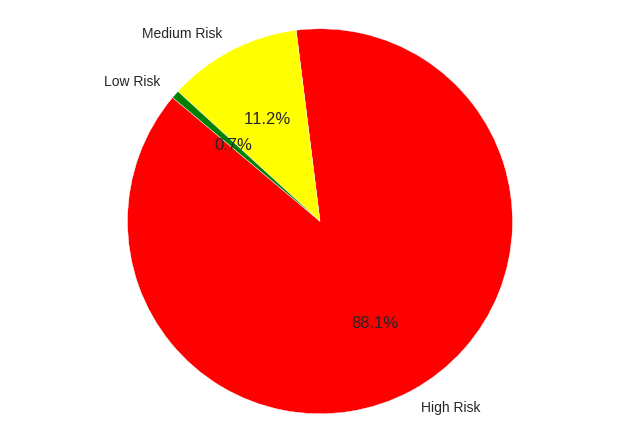

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [past_mh_high, past_mh_med, past_mh_low]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.savefig("past_mh_disorder_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

Fraction of employees belonging to different age groups in each risk-cluster


In [ ]:
tot_age_18_25=0
tot_age_26_45=0
tot_age_46_65=0
tot_age_66_75=0

age_18_25_high=0
age_18_25_med=0
age_18_25_low=0

age_26_45_high=0
age_26_45_med=0
age_26_45_low=0

age_46_65_high=0
age_46_65_med=0
age_46_65_low=0

age_66_75_high=0
age_66_75_med=0
age_66_75_low=0
for i in range(len(high_risk_class)) :
        if(df.iloc[high_risk_class[i],40]>=18 and df.iloc[high_risk_class[i],40]<=25):
            tot_age_18_25+=1
            age_18_25_high+=1
        elif(df.iloc[high_risk_class[i],40]>=26 and df.iloc[high_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_high+=1
        elif(df.iloc[high_risk_class[i],40]>=46 and df.iloc[high_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_high+=1
        elif(df.iloc[high_risk_class[i],40]>=66 and df.iloc[high_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_high+=1
for i in range(len(med_risk_class)) :
        if(df.iloc[med_risk_class[i],40]>=18 and df.iloc[med_risk_class[i],40]<=25):
            tot_age_18_25+=1
            age_18_25_med+=1
        elif(df.iloc[med_risk_class[i],40]>=26 and df.iloc[med_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_med+=1
        elif(df.iloc[med_risk_class[i],40]>=46 and df.iloc[med_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_med+=1
        elif(df.iloc[med_risk_class[i],40]>=66 and df.iloc[med_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_med+=1
for i in range(len(low_risk_class)) :
        if(df.iloc[low_risk_class[i],40]>=18 and df.iloc[low_risk_class[i],40]<=25):
            tot_age_18_25+=1
            age_18_25_low+=1
        elif(df.iloc[low_risk_class[i],40]>=26 and df.iloc[low_risk_class[i],40]<=45):
          tot_age_26_45+=1
          age_26_45_low+=1
        elif(df.iloc[low_risk_class[i],40]>=46 and df.iloc[low_risk_class[i],40]<=65):
          tot_age_46_65+=1
          age_46_65_low+=1
        elif(df.iloc[low_risk_class[i],40]>=66 and df.iloc[low_risk_class[i],40]<=75):
          tot_age_66_75+=1
          age_66_75_low+=1


In [ ]:
age_high = [age_18_25_high/tot_age_18_25,age_26_45_high/tot_age_26_45, age_46_65_high/tot_age_46_65, age_66_75_high/tot_age_66_75 ]
age_med = [age_18_25_med/tot_age_18_25, age_26_45_med/tot_age_26_45, age_46_65_med/tot_age_46_65, age_66_75_med/tot_age_66_75 ]
age_low = [age_18_25_low/tot_age_18_25, age_26_45_low/tot_age_26_45, age_46_65_low/tot_age_46_65, age_66_75_low/tot_age_66_75 ]

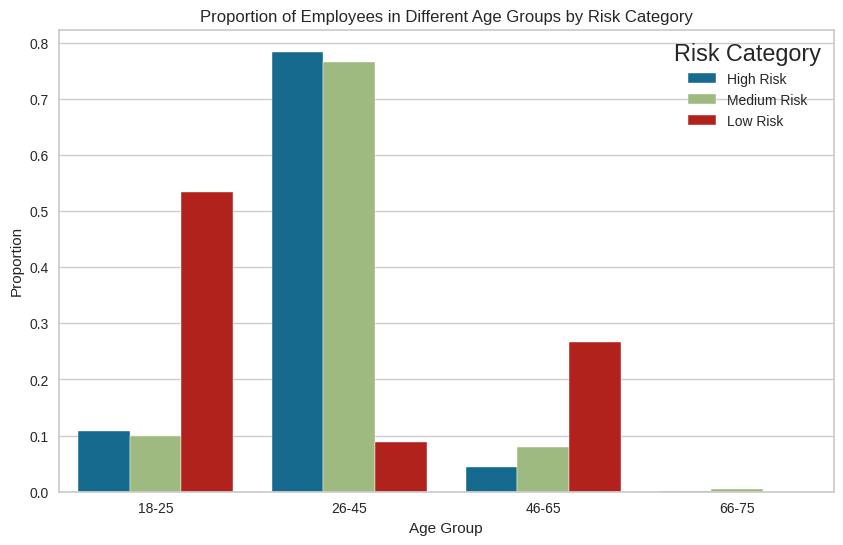

Age High Risk Proportions: [0.10884353741496598, 0.7835884353741497, 0.043579931972789115, 0.0012755102040816326]
Age Medium Risk Proportions: [0.0994236311239193, 0.7646493756003843, 0.0792507204610951, 0.005283381364073006]
Age Low Risk Proportions: [0.5333333333333333, 0.08888888888888889, 0.26666666666666666, 0.0]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame and age column is at index 40
# Define the age brackets and risk classes
age_brackets = {
    '18-25': 0,
    '26-45': 1,
    '46-65': 2,
    '66-75': 3
}

# Initialize counts for each risk category
age_counts = {
    'high': [0] * len(age_brackets),
    'medium': [0] * len(age_brackets),
    'low': [0] * len(age_brackets)
}

# Total counts for each risk class to calculate proportions later
totals = {
    'high': 0,
    'medium': 0,
    'low': 0
}

# Function to update counts based on age and risk class
def update_counts(age, risk_class):
    if 18 <= age <= 25:
        age_counts[risk_class][age_brackets['18-25']] += 1
    elif 26 <= age <= 45:
        age_counts[risk_class][age_brackets['26-45']] += 1
    elif 46 <= age <= 65:
        age_counts[risk_class][age_brackets['46-65']] += 1
    elif 66 <= age <= 75:
        age_counts[risk_class][age_brackets['66-75']] += 1

# Count employees for each risk class
for risk_class, indices in zip(['high', 'medium', 'low'], [high_risk_class, med_risk_class, low_risk_class]):
    totals[risk_class] = len(indices)  # Count total employees in risk class
    for index in indices:
        age = df.iloc[index, 40]  # Get the age value
        update_counts(age, risk_class)

# Calculate proportions for each age group in each risk class
age_proportions = {
    'high': [age_counts['high'][i] / totals['high'] if totals['high'] > 0 else 0 for i in range(len(age_brackets))],
    'medium': [age_counts['medium'][i] / totals['medium'] if totals['medium'] > 0 else 0 for i in range(len(age_brackets))],
    'low': [age_counts['low'][i] / totals['low'] if totals['low'] > 0 else 0 for i in range(len(age_brackets))]
}

# Prepare for visualization
age_labels = list(age_brackets.keys())
high_proportions = age_proportions['high']
medium_proportions = age_proportions['medium']
low_proportions = age_proportions['low']

# Create a DataFrame for visualization
results_df = pd.DataFrame({
    'Age Group': age_labels,
    'High Risk': high_proportions,
    'Medium Risk': medium_proportions,
    'Low Risk': low_proportions
})

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars='Age Group', var_name='Risk Category', value_name='Proportion'),
             x='Age Group', y='Proportion', hue='Risk Category')
plt.title('Proportion of Employees in Different Age Groups by Risk Category')
plt.ylabel('Proportion')
plt.xlabel('Age Group')
plt.legend(title='Risk Category')
plt.savefig('age_proportions.png')
plt.show()

# Print age proportions
print("Age High Risk Proportions:", age_proportions['high'])
print("Age Medium Risk Proportions:", age_proportions['medium'])
print("Age Low Risk Proportions:", age_proportions['low'])


In [ ]:
y1=[round(i*100,2) for i in age_high]
y2=[round(i*100,2) for i in age_med]
y3=[round(i*100,2) for i in age_low]

In [ ]:
import plotly.graph_objects as go
x =['18-25', '26-45', '46-65', '66-75']
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y1, name='High-Risk',text=[str(x)+"%" for x in y1], marker_color='red'))
fig.add_trace(go.Bar(x=x, y=y2,name='Medium-Risk',text=[str(x)+"%"  for x in y2], marker_color='yellow'))
fig.add_trace(go.Bar(x=x, y=y3,name='Low-Risk',text=[str(x)+"%"  for x in y3], marker_color='green'))
fig.update_layout(barmode='stack',  xaxis_title='Age of Employees', yaxis_title='Fraction of employees<br>in different risk levels')
#fig.savefig('rating_tech_supp.jpg')
fig.show()

Fraction of female employees in each risk-cluster

In [ ]:
# print(len(high_risk_class))
# print(len(med_risk_class))
# print(len(low_risk_class))
l=[]
for i in range(len(high_risk_class)) :

        l.append(df.iloc[high_risk_class[i],41])
from collections import Counter
fem_high=Counter(l)[2]
# print(Counter(l)[3])
# print(Counter(l)[1])
# print(Counter(l)[2])
l=[]
for i in range(len(med_risk_class)) :

        l.append(df.iloc[med_risk_class[i],31])

from collections import Counter
fem_med=Counter(l)[2]
# print(Counter(l)[3])
# print(Counter(l)[1])
# print(Counter(l)[2])
l=[]
for i in range(len(low_risk_class)) :

        l.append(df.iloc[low_risk_class[i],31])
from collections import Counter
fem_low=Counter(l)[2]
# print(Counter(l)[3])
# print(Counter(l)[1])
# print(Counter(l)[2])

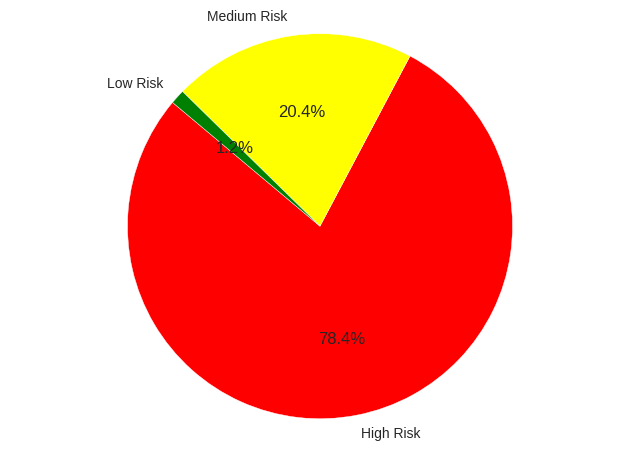

In [ ]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [fem_high, fem_med, fem_low]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.savefig("female_risk.jpg",bbox_inches='tight', dpi=150)
plt.show()

Effect of lack of social support towards mental health by employers

<Figure size 1600x800 with 0 Axes>

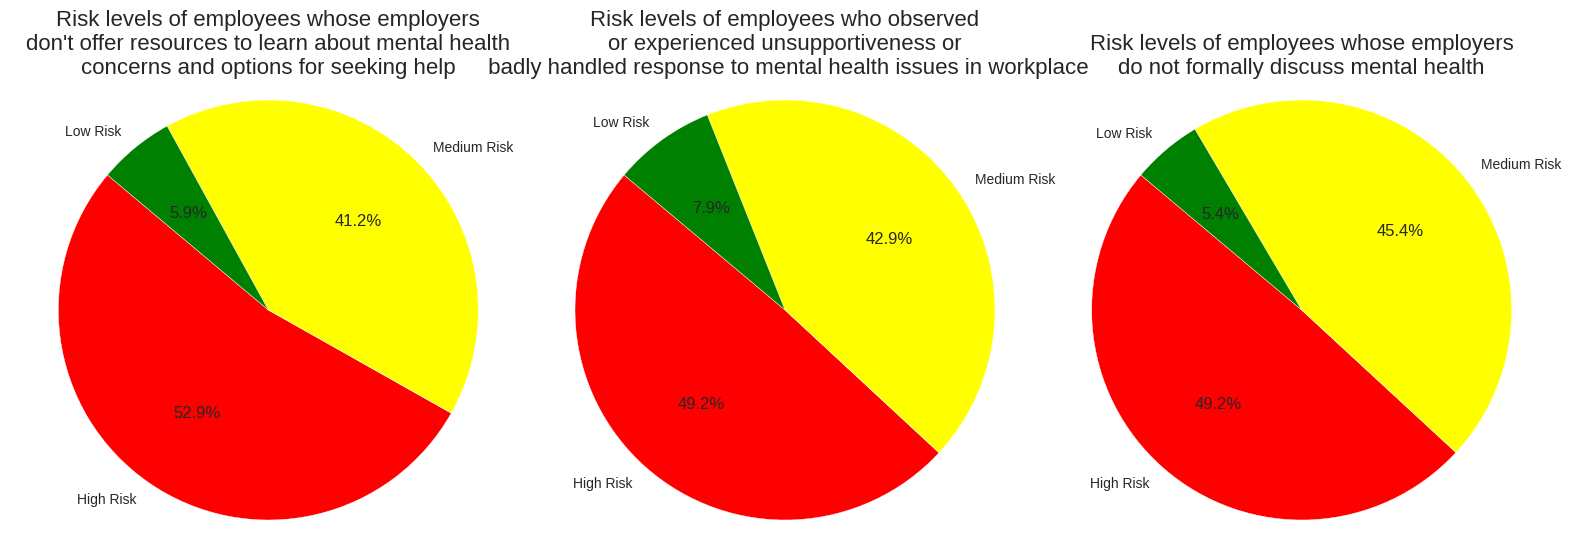

In [ ]:
#Proportions of gender based on region
# Pie Chart
plt.rcParams['font.size'] = 12
plt.figure(figsize = (16,8))
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_figheight(6)
fig.set_figwidth(20)
plt.subplots_adjust(wspace =-0)
#fig.suptitle('Social support towards mental health by employers', fontsize = 18, y=1.08)

#For Eurpoe
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [126, 98, 14]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
ax1.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.axis('equal')
ax1.set_title('Risk levels of employees whose employers\ndon\'t offer resources to learn about mental health\nconcerns and options for seeking help', pad =3, fontsize =16)


#For America
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [94, 82, 15]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
ax2.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Risk levels of employees who observed\nor experienced unsupportiveness or\n badly handled response to mental health issues in workplace', pad =3, fontsize =16)

#For Asia Africa and Australia
labels = 'High Risk','Medium Risk','Low Risk'
sizes = [228, 210, 25]
colors = ['red', 'yellow', 'green']
#explode = (0.1, 0, 0)  # explode 1st slice
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', startangle=140)
ax3.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax3.axis('equal')
ax3.set_title('Risk levels of employees whose employers\ndo not formally discuss mental health', pad =3, fontsize =16)

plt.savefig('social_supp_by_emp.png')

Pre and post covid analysis

Fraction of employers offering their employees resources to learn more about mental
health disorders and options for seeking help

In [ ]:
dis_form17=df17['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form18=df18['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form19=df19['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form20=df20['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
dis_form21=df21['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']
res17=df17["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res18=df18["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res19=df19["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res20=df20["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
res21=df21["Does your employer offer resources to learn more about mental health disorders and options for seeking help?"]
from collections import Counter
dis_form_cnt17=round(Counter(dis_form17)['Yes']/len(dis_form17)*100,1)
dis_form_cnt18=round(Counter(dis_form18)['Yes']/len(dis_form18)*100,1)
dis_form_cnt19=round(Counter(dis_form19)['Yes']/len(dis_form19)*100,1)
dis_form_cnt20=round(Counter(dis_form20)['Yes']/len(dis_form20)*100,1)
dis_form_cnt21=round(Counter(dis_form21)['Yes']/len(dis_form21)*100,1)
res_cnt17=round(Counter(res17)['Yes']/len(res17)*100,1)
res_cnt18=round(Counter(res18)['Yes']/len(res18)*100,1)
res_cnt19=round(Counter(res19)['Yes']/len(res19)*100,1)
res_cnt20=round(Counter(res20)['Yes']/len(res20)*100,1)
res_cnt21=round(Counter(res21)['Yes']/len(res21)*100,1)
dis_form=[dis_form_cnt17,dis_form_cnt18,dis_form_cnt19,dis_form_cnt20,dis_form_cnt21]
res=[res_cnt17,res_cnt18,res_cnt19,res_cnt20,res_cnt21]

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=res,text=[str(x)+"%" for x in res]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employers providing employees<br>with mental healthcare related resources<br>and options to seek help')
fig.show()

Fraction of employers who have formally discussed mental health

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=dis_form,text=[str(x)+"%" for x in dis_form]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employers formally discussing<br>about mental health with employees')
fig.show()

Fraction of employees who have observed or experienced an unsupportive or badly
handled response to a mental health issue their workplace


In [ ]:
unsup17=df17['<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>']
unsup18=df18['<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>']
unsup19=df19['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?']
unsup20=df20['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?']
unsup21=df21['Have you observed or experienced an *unsupportive or badly handled response* to a mental health issue in your current or previous workplace?']

print(unsup17.unique())
print(unsup18.unique())
print(unsup19.unique())
print(unsup20.unique())
print(unsup21.unique())

unsup_cnt17=[0 for i in range(3)]
unsup_cnt18=[0 for i in range(3)]
unsup_cnt19=[0 for i in range(3)]
unsup_cnt20=[0 for i in range(3)]
unsup_cnt21=[0 for i in range(3)]

for t in unsup17:
  if(t=='Yes, I experienced'):
    unsup_cnt17[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt17[1]+=1
  elif(t=='No'):
    unsup_cnt17[2]+=1


for t in unsup18:
  if(t=='Yes, I experienced'):
    unsup_cnt18[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt18[1]+=1
  elif(t=='No'):
    unsup_cnt18[2]+=1

for t in unsup19:
  if(t=='Yes, I experienced'):
    unsup_cnt19[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt19[1]+=1
  elif(t=='No'):
    unsup_cnt19[2]+=1

for t in unsup20:
  if(t=='Yes, I experienced'):
    unsup_cnt20[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt20[1]+=1
  elif(t=='No'):
    unsup_cnt20[2]+=1

for t in unsup21:
  if(t=='Yes, I experienced'):
    unsup_cnt21[0]+=1
  elif(t=='Yes, I observed'):
    unsup_cnt21[1]+=1
  elif(t=='No'):
    unsup_cnt21[2]+=1

    unsup_sum17=sum(unsup_cnt17)
unsup_sum18=sum(unsup_cnt18)
unsup_sum19=sum(unsup_cnt19)
unsup_sum20=sum(unsup_cnt20)
unsup_sum21=sum(unsup_cnt21)
# cal %
for i in range(3):
  unsup_cnt17[i]=round((unsup_cnt17[i]/unsup_sum17)*100,1)
  unsup_cnt18[i]=round((unsup_cnt18[i]/unsup_sum18)*100,1)
  unsup_cnt19[i]=round((unsup_cnt19[i]/unsup_sum19)*100,1)
  unsup_cnt20[i]=round((unsup_cnt20[i]/unsup_sum20)*100,1)
  unsup_cnt21[i]=round((unsup_cnt21[i]/unsup_sum21)*100,1)

unsup_exp=[unsup_cnt17[0], unsup_cnt18[0], unsup_cnt19[0], unsup_cnt20[0], unsup_cnt21[0]]
unsup_obs=[unsup_cnt17[1], unsup_cnt18[1], unsup_cnt19[1], unsup_cnt20[1], unsup_cnt21[1]]
unsup_no= [unsup_cnt17[2], unsup_cnt18[2], unsup_cnt19[2], unsup_cnt20[2], unsup_cnt21[2]]
unsup=[unsup_cnt17[0]+unsup_cnt17[1], unsup_cnt18[0]+unsup_cnt18[1], unsup_cnt19[0]+unsup_cnt19[1], unsup_cnt20[0]+unsup_cnt20[1], unsup_cnt21[0]+unsup_cnt21[1]]

unsup=[39.8, 42.6, 46.4, 43.5, 30.8]

['Yes, I experienced' 'Yes, I observed' 'Maybe/Not sure' 'No'
 "I've always been self-employed" nan]
['Yes, I observed' 'No' 'Maybe/Not sure' 'Yes, I experienced'
 "I've always been self-employed"]
['No' 'Yes, I observed' 'Maybe/Not sure' 'Yes, I experienced'
 "I've always been self-employed"]
['Maybe/Not sure' 'Yes, I observed' 'Yes, I experienced' 'No'
 "I've always been self-employed"]
['No' 'Yes, I observed' 'Maybe/Not sure' 'Yes, I experienced'
 "I've always been self-employed"]


In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=unsup,text=[str(x)+"%" for x in unsup]))

fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employees who\'ve observed or<br>experienced unsupportive response to<br>mental health issues in their workplace ')
fig.show()


Fraction of employees who have discussed their mental health with their employer
and/or co-workers

In [ ]:
dis_emp17=df17['Have you ever discussed your mental health with your employer?']
dis_emp18=df18['Have you ever discussed your mental health with your employer?']
dis_emp19=df19['Have you ever discussed your mental health with your employer?']
dis_emp20=df20['Have you ever discussed your mental health with your employer?']
dis_emp21=df21['Have you ever discussed your mental health with your employer?']
dis_cow17=df17['Have you ever discussed your mental health with coworkers?']
dis_cow18=df18['Have you ever discussed your mental health with coworkers?']
dis_cow19=df19['Have you ever discussed your mental health with coworkers?']
dis_cow20=df20['Have you ever discussed your mental health with coworkers?']
dis_cow21=df21['Have you ever discussed your mental health with coworkers?']


dis_emp_cnt17=round(np.nansum(np.array(dis_emp17))/len(dis_emp17)*100,1)
dis_emp_cnt18=round(np.nansum(np.array(dis_emp18))/len(dis_emp18)*100,1)
dis_emp_cnt19=round(np.nansum(np.array(dis_emp19))/len(dis_emp19)*100,1)
dis_emp_cnt20=round(np.nansum(np.array(dis_emp20))/len(dis_emp20)*100,1)
dis_emp_cnt21=round(np.nansum(np.array(dis_emp21))/len(dis_emp21)*100,1)
dis_cow_cnt17=round(np.nansum(np.array(dis_cow17))/len(dis_cow17)*100,1)
dis_cow_cnt18=round(np.nansum(np.array(dis_cow18))/len(dis_cow18)*100,1)
dis_cow_cnt19=round(np.nansum(np.array(dis_cow19))/len(dis_cow19)*100,1)
dis_cow_cnt20=round(np.nansum(np.array(dis_cow20))/len(dis_cow20)*100,1)
dis_cow_cnt21=round(np.nansum(np.array(dis_cow21))/len(dis_cow21)*100,1)

dis_emp=[dis_emp_cnt17,dis_emp_cnt18,dis_emp_cnt19,dis_emp_cnt20,dis_emp_cnt21]
dis_cow=[dis_cow_cnt17,dis_cow_cnt18,dis_cow_cnt19,dis_cow_cnt20,dis_cow_cnt21]

In [ ]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='Discussion with employer', x=years, y=dis_emp,text=[str(x)+"%" for x in dis_emp]),
    go.Bar(name='Discussion with co-worker', x=years, y=dis_cow,text=[str(x)+"%" for x in dis_cow])])
# Change the bar mode

fig.update_layout(barmode='group', xaxis_title='Year', yaxis_title='Fraction of employees discussing<br>mental health issues in workplace')
fig.show()

Fraction of employees who feel that requesting a medical leave from work due to
a mental health issue is easy

In [ ]:
leave17=df17['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave18=df18['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave19=df19['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave20=df20['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']
leave21=df21['If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?']

lv_cnt17=[0 for i in range(6)]
lv_cnt18=[0 for i in range(6)]
lv_cnt19=[0 for i in range(6)]
lv_cnt20=[0 for i in range(6)]
lv_cnt21=[0 for i in range(6)]


for t in leave17:
  if(t=='Very easy'):
    lv_cnt17[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt17[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt17[2]+=1
  elif(t=="I don't know"):
    lv_cnt17[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt17[4]+=1
  elif(t=='Difficult'):
    lv_cnt17[5]+=1

for t in leave18:
  if(t=='Very easy'):
    lv_cnt18[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt18[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt18[2]+=1
  elif(t=="I don't know"):
    lv_cnt18[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt18[4]+=1
  elif(t=='Difficult'):
    lv_cnt18[5]+=1

for t in leave19:
  if(t=='Very easy'):
    lv_cnt19[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt19[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt19[2]+=1
  elif(t=="I don't know"):
    lv_cnt19[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt19[4]+=1
  elif(t=='Difficult'):
    lv_cnt19[5]+=1

for t in leave20:
  if(t=='Very easy'):
    lv_cnt20[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt20[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt20[2]+=1
  elif(t=="I don't know"):
    lv_cnt20[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt20[4]+=1
  elif(t=='Difficult'):
    lv_cnt20[5]+=1

for t in leave21:
  if(t=='Very easy'):
    lv_cnt21[0]+=1
  elif(t=='Somewhat easy'):
    lv_cnt21[1]+=1
  elif(t=='Neither easy nor difficult'):
    lv_cnt21[2]+=1
  elif(t=="I don't know"):
    lv_cnt21[3]+= 1
  elif(t=='Somewhat difficult'):
    lv_cnt21[4]+=1
  elif(t=='Difficult'):
    lv_cnt21[5]+=1

lv_sum17=sum(lv_cnt17)
lv_sum18=sum(lv_cnt18)
lv_sum19=sum(lv_cnt19)
lv_sum20=sum(lv_cnt20)
lv_sum21=sum(lv_cnt21)

# cal %
for i in range(6):
  lv_cnt17[i]=round((lv_cnt17[i]/lv_sum17)*100,1)
  lv_cnt18[i]=round((lv_cnt18[i]/lv_sum18)*100,1)
  lv_cnt19[i]=round((lv_cnt19[i]/lv_sum19)*100,1)
  lv_cnt20[i]=round((lv_cnt20[i]/lv_sum20)*100,1)
  lv_cnt21[i]=round((lv_cnt21[i]/lv_sum21)*100,1)

In [ ]:
leave_ease=[lv_cnt17[0], lv_cnt18[0], lv_cnt19[0], lv_cnt20[0], lv_cnt21[0]]
leave_diff=[lv_cnt17[5], lv_cnt18[5], lv_cnt19[5], lv_cnt20[5], lv_cnt21[5]]
leave_som_wat_diff=[lv_cnt17[4], lv_cnt18[4], lv_cnt19[4], lv_cnt20[4], lv_cnt21[4]]
leave_som_wat_ease=[lv_cnt17[1], lv_cnt18[1], lv_cnt19[1], lv_cnt20[1], lv_cnt21[1]]
leave_df=[lv_cnt17[5]+lv_cnt17[4], lv_cnt18[5]+lv_cnt18[5], lv_cnt19[5]+lv_cnt19[4], lv_cnt20[5]+lv_cnt20[4], lv_cnt21[5]+lv_cnt21[4]]
leave_es=[lv_cnt17[0]+lv_cnt17[1], lv_cnt18[0]+lv_cnt18[1], lv_cnt19[0]+lv_cnt19[1], lv_cnt20[0]+lv_cnt20[1], lv_cnt21[0]+lv_cnt21[1]]
years = ['2017', '2018', '2019', '2020', '2021']

In [ ]:
import plotly.graph_objects as go
years = ['2017', '2018', '2019', '2020', '2021']
fig = go.Figure()
fig.add_trace(go.Bar(x=years, y=leave_es,text=[str(round(x,1))+"%" for x in leave_es]))
fig.update_layout(xaxis_title='Year', yaxis_title='Fraction of employees who feel<br>asking a medical leave from work<br>due to a mental health issue is easy')
fig.show()

Employees’ rating (1-10) on the importance placed by their employers on physical
and mental health

In [ ]:
imp_ph17=df17['Overall, how much importance does your employer place on physical health?']
imp_ph18=df18['Overall, how much importance does your employer place on physical health?']
imp_ph19=df19['Overall, how much importance does your employer place on physical health?']
imp_ph20=df20['Overall, how much importance does your employer place on physical health?']
imp_ph21=df21['Overall, how much importance does your employer place on physical health?']


imp_mh17=df17['Overall, how much importance does your employer place on mental health?']
imp_mh18=df18['Overall, how much importance does your employer place on mental health?']
imp_mh19=df19['Overall, how much importance does your employer place on mental health?']
imp_mh20=df20['Overall, how much importance does your employer place on mental health?']
imp_mh21=df21['Overall, how much importance does your employer place on mental health?']


imp_ph_avg17 = round(np.nanmean(np.array(imp_ph17)),1)
imp_ph_avg18=round(np.nanmean(np.array(imp_ph18)),1)
imp_ph_avg19=round(np.nanmean(np.array(imp_ph19)),1)
imp_ph_avg20=round(np.nanmean(np.array(imp_ph20)),1)
imp_ph_avg21=round(np.nanmean(np.array(imp_ph21)),1)
imp_mh_avg17=round(np.nanmean(np.array(imp_mh17)),1)
imp_mh_avg18=round(np.nanmean(np.array(imp_mh18)),1)
imp_mh_avg19=round(np.nanmean(np.array(imp_mh19)),1)
imp_mh_avg20=round(np.nanmean(np.array(imp_mh20)),1)
imp_mh_avg21=round(np.nanmean(np.array(imp_mh21)),1)


imp_ph_data= [imp_ph_avg17, imp_ph_avg18, imp_ph_avg19, imp_ph_avg20, imp_ph_avg21]
imp_mh_data= [imp_mh_avg17, imp_mh_avg18, imp_mh_avg19, imp_mh_avg20, imp_mh_avg21]

TypeError: Axes.annotate() missing 1 required positional argument: 'text'

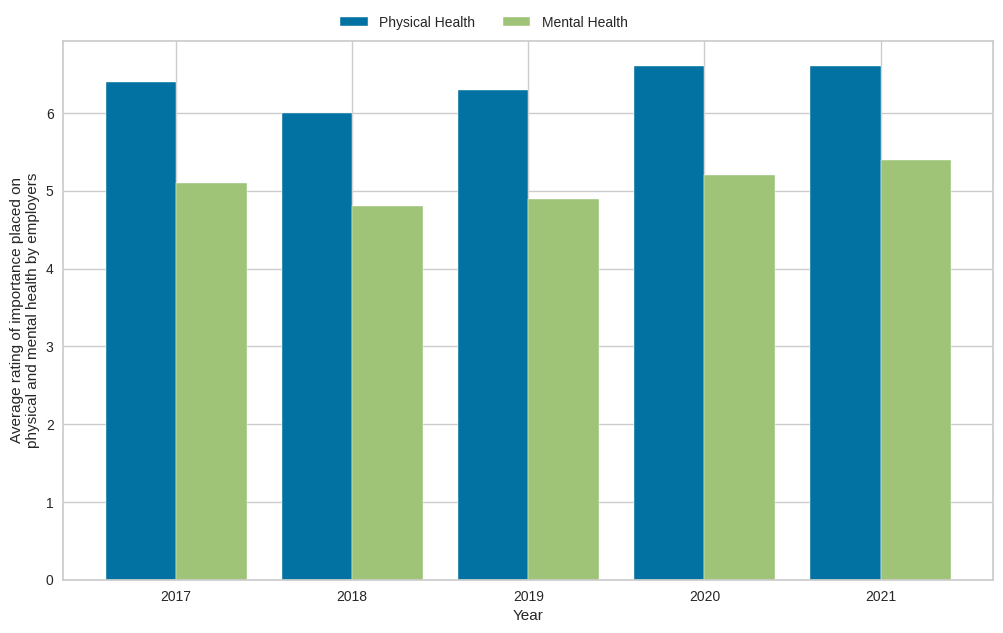

In [ ]:
width = 0.40
years = ['2017', '2018', '2019', '2020', '2021']
x = np.arange(5)
# plot data in grouped manner of bar type
fig, ax = plt.subplots(figsize=(12,7))
ph=plt.bar(x-0.2, imp_ph_data, width)
mh=plt.bar(x+0.2, imp_mh_data, width)
plt.xticks(x, years)
plt.xlabel("Year")
plt.ylabel("Average rating of importance placed on\nphysical and mental health by employers")
plt.legend(["Physical Health", "Mental Health"],bbox_to_anchor =(0.62, 1.07), ncol = 2)
for p in ax.patches:
    ax.annotate(s=np.round(p.get_height(), decimals=2),xy=(p.get_x()+p.get_width()/2., p.get_height()),ha='center',va='center',xytext=(0, 10),textcoords='offset points')
plt.savefig('imp_ph_mh1.jpg')
plt.show()

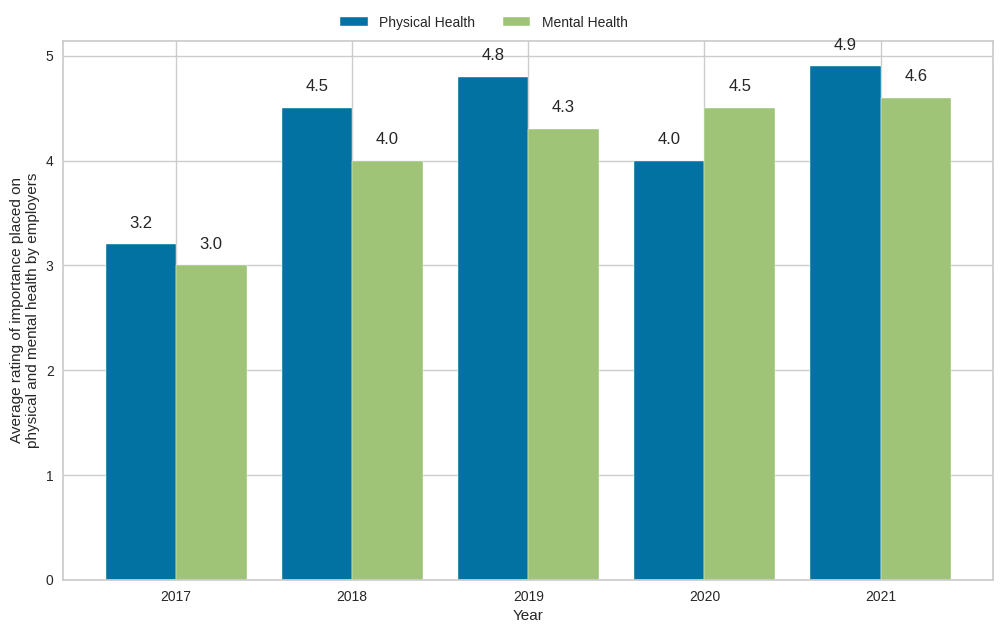

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for demonstration
years = ['2017', '2018', '2019', '2020', '2021']
imp_ph_data = [3.2, 4.5, 4.8, 4.0, 4.9]  # Replace with your actual data
imp_mh_data = [3.0, 4.0, 4.3, 4.5, 4.6]  # Replace with your actual data

width = 0.40
x = np.arange(len(years))

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 7))
ph = ax.bar(x - 0.2, imp_ph_data, width, label='Physical Health')
mh = ax.bar(x + 0.2, imp_mh_data, width, label='Mental Health')

# Set the ticks and labels
plt.xticks(x, years)
plt.xlabel("Year")
plt.ylabel("Average rating of importance placed on\nphysical and mental health by employers")

# Add legend
plt.legend(bbox_to_anchor=(0.62, 1.07), ncol=2)

# Annotate the bars with their height values
for p in ax.patches:
    ax.annotate(text=np.round(p.get_height(), decimals=2),
                xy=(p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',  # Adjusted to use 'bottom' for better visibility
                xytext=(0, 10), textcoords='offset points')

# Save and show the plot
plt.savefig('imp_ph_mh1.jpg')
plt.show()


Fraction of employees who have observed or experienced a supportive or well-
handled response to a mental health issue their workplace

In [ ]:
sup17=df17['<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>']
sup18=df18['<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>']
sup19=df19['Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?']
sup20=df20['Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?']
sup21=df21['Have you observed or experienced a *supportive or well handled response* to a mental health issue in your current or previous workplace?']

sup_cnt17=[0 for i in range(3)]
sup_cnt18=[0 for i in range(3)]
sup_cnt19=[0 for i in range(3)]
sup_cnt20=[0 for i in range(3)]
sup_cnt21=[0 for i in range(3)]

for t in sup17:
  if(t=='Yes, I experienced'):
    sup_cnt17[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt17[1]+=1
  elif(t=='No'):
    sup_cnt17[2]+=1


for t in sup18:
  if(t=='Yes, I experienced'):
    sup_cnt18[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt18[1]+=1
  elif(t=='No'):
    sup_cnt18[2]+=1

for t in sup19:
  if(t=='Yes, I experienced'):
    sup_cnt19[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt19[1]+=1
  elif(t=='No'):
    sup_cnt19[2]+=1

for t in sup20:
  if(t=='Yes, I experienced'):
    sup_cnt20[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt20[1]+=1
  elif(t=='No'):
    sup_cnt20[2]+=1

for t in sup21:
  if(t=='Yes, I experienced'):
    sup_cnt21[0]+=1
  elif(t=='Yes, I observed'):
    sup_cnt21[1]+=1
  elif(t=='No'):
    sup_cnt21[2]+=1

sup_sum17=sum(sup_cnt17)
sup_sum18=sum(sup_cnt18)
sup_sum19=sum(sup_cnt19)
sup_sum20=sum(sup_cnt20)
sup_sum21=sum(sup_cnt21)
# cal %
for i in range(3):
  sup_cnt17[i]=round((sup_cnt17[i]/sup_sum17)*100,1)
  sup_cnt18[i]=round((sup_cnt18[i]/sup_sum18)*100,1)
  sup_cnt19[i]=round((sup_cnt19[i]/sup_sum19)*100,1)
  sup_cnt20[i]=round((sup_cnt20[i]/sup_sum20)*100,1)
  sup_cnt21[i]=round((sup_cnt21[i]/sup_sum21)*100,1)

sup_exp=[sup_cnt17[0], sup_cnt18[0], sup_cnt19[0], sup_cnt20[0], sup_cnt21[0]]
sup_obs=[sup_cnt17[1], sup_cnt18[1], sup_cnt19[1], sup_cnt20[1], sup_cnt21[1]]
sup=[sup_cnt17[0]+sup_cnt17[1], sup_cnt18[0]+sup_cnt18[1], sup_cnt19[0]+sup_cnt19[1], sup_cnt20[0]+sup_cnt20[1], sup_cnt21[0]+sup_cnt21[1]]
sup_no= [sup_cnt17[2], sup_cnt18[2], sup_cnt19[2], sup_cnt20[2], sup_cnt21[2]]

In [ ]:
sup_data= np.array([sup_cnt17, sup_cnt18, sup_cnt19, sup_cnt20, sup_cnt21]).T
sup_data_list=sup_data.tolist()

In [ ]:
import plotly.graph_objects as go
x = ['2017', '2018', '2019', '2020', '2021']

fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=sup_data_list[0], name='Supportiveness experienced',text=[str(x)+"%" for x in sup_data_list[0]]))
fig.add_trace(go.Bar(x=x, y=sup_data_list[1],name='Supportiveness observed',text=[str(x)+"%"  for x in sup_data_list[1]]))
fig.add_trace(go.Bar(x=x, y=sup_data_list[2],name='Supportiveness neither<br>observed nor experienced',text=[str(x)+"%"  for x in sup_data_list[2]]))

fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Fraction of employees who\'ve observed or<br>experienced supportive response to<br>mental health issues in their workplace ')
fig.show()


Employees’ rating (scale 1-5) of tech industry’s support for employees with mental
health issues

In [ ]:
tech_sup17=df17['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup18=df18['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup19=df19['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup20=df20['Overall, how well do you think the tech industry supports employees with mental health issues?']
tech_sup21=df21['Overall, how well do you think the tech industry supports employees with mental health issues?']

aavg17= np.nanmean(np.array(tech_sup17))
aavg18= np.nanmean(np.array(tech_sup18))
aavg19= np.nanmean(np.array(tech_sup19))
aavg20=np.nanmean(np.array(tech_sup20))
aavg21= np.nanmean(np.array(tech_sup21))
cnt17=[0 for i in range(5)]
cnt18=[0 for i in range(5)]
cnt19=[0 for i in range(5)]
cnt20=[0 for i in range(5)]
cnt21=[0 for i in range(5)]

for t in tech_sup17:
  if(t==1):
    cnt17[0] = cnt17[0] + 1
  elif(t==2):
    cnt17[1]=cnt17[1]+1
  elif(t==3):
    cnt17[2]=cnt17[2]+1
  elif(t==4):
    cnt17[3]=cnt17[3]+1
  elif(t==5):
    cnt17[4]=cnt17[4]+1
for t in tech_sup18:
  if(t==1):
    cnt18[0] = cnt18[0] + 1
  elif(t==2):
    cnt18[1]=cnt18[1]+1
  elif(t==3):
    cnt18[2]=cnt18[2]+1
  elif(t==4):
    cnt18[3]=cnt18[3]+1
  elif(t==5):
    cnt18[4]=cnt18[4]+1
for t in tech_sup19:
  if(t==1):
    cnt19[0] = cnt19[0] + 1
  elif(t==2):
    cnt19[1]=cnt19[1]+1
  elif(t==3):
    cnt19[2]=cnt19[2]+1
  elif(t==4):
    cnt19[3]=cnt19[3]+1
  elif(t==5):
    cnt19[4]=cnt19[4]+1
for t in tech_sup20:
  if(t==1):
    cnt20[0] = cnt20[0] + 1
  elif(t==2):
    cnt20[1]=cnt20[1]+1
  elif(t==3):
    cnt20[2]=cnt20[2]+1
  elif(t==4):
    cnt20[3]=cnt20[3]+1
  elif(t==5):
    cnt20[4]=cnt20[4]+1
for t in tech_sup21:
  if(t==1):
    cnt21[0] = cnt21[0] + 1
  elif(t==2):
    cnt21[1]=cnt21[1]+1
  elif(t==3):
    cnt21[2]=cnt21[2]+1
  elif(t==4):
    cnt21[3]=cnt21[3]+1
  elif(t==5):
    cnt21[4]=cnt21[4]+1

sum17=sum(cnt17)
sum18=sum(cnt18)
sum19=sum(cnt19)
sum20=sum(cnt20)
sum21=sum(cnt21)
for i in range(5):
  cnt17[i]=round((cnt17[i]/sum17)*100,1)
  cnt18[i]=round((cnt18[i]/sum18)*100,1)
  cnt19[i]=round((cnt19[i]/sum19)*100,1)
  cnt20[i]=round((cnt20[i]/sum20)*100,1)
  cnt21[i]=round((cnt21[i]/sum21)*100,1)

In [ ]:
Rating=['1', '2', '3', '4', '5']
rate_data= np.array([cnt17, cnt18, cnt19, cnt20, cnt21]).T
rate_data_list=rate_data.tolist()

In [ ]:
!pip install kaleido
import kaleido #required
kaleido.__version__ #0.2.1

import plotly
plotly.__version__ #5.5.0


'5.24.1'

In [ ]:
# pip install plotly==5.3.1

In [ ]:
# import plotly
# import kaleido
import plotly.graph_objects as go
x = ['2017', '2018', '2019', '2020', '2021']
p="%"
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=rate_data_list[0], name='1',text=[str(x)+"%" for x in rate_data_list[0]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[1],name='2',text=[str(x)+"%"  for x in rate_data_list[1]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[2],name='3',text=[str(x)+"%"  for x in rate_data_list[2]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[3],name='4',text=[str(x)+"%"  for x in rate_data_list[3]]))
fig.add_trace(go.Bar(x=x, y=rate_data_list[4],name='5',text=[str(x)+"%"  for x in rate_data_list[4]]))
fig.update_layout(barmode='stack', xaxis_title='Year', yaxis_title='Rating (on a scale of 1-5)')
fig.show()